# 1. Importing The Huggingface Transformers Pipeline

#### 1. The Hugging Face Transformers library is a library of pre-trained state-of-the-art models for natural language processing tasks such as text classification, language translation, and question answering. 
#### 2. The pipeline is a high-level API that allows users to easily access and use these pre-trained models for their own NLP tasks, without the need for extensive knowledge of the underlying model architecture. 
#### 3. The pipeline takes in a text input and returns the model's predictions or output. 

In [1]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


# 2. Lets test it 

In [2]:
sent_pipeline('This product have decent build quality')

[{'label': 'POSITIVE', 'score': 0.9997552037239075}]

In [3]:
sent_pipeline('worst products on flipkart😁')

[{'label': 'NEGATIVE', 'score': 0.9998138546943665}]

# 3. Importing libraries

In [4]:
import pandas as pd
import numpy as np

# 4. Importing Data

In [6]:
df = pd.read_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_reviews_2.csv")

In [7]:
df.tail()

prod_id                                       product_name  \
917572  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917573  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917574  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917575  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917576  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   

       brand_name    category    price  sold  \
917572     Xiaomi  television  99999.0     1   
917573     Xiaomi  television  99999.0     1   
917574     Xiaomi  television  99999.0     1   
917575     Xiaomi  television  99999.0     1   
917576     Xiaomi  television  99999.0     1   

                                                 prod_url    customer_name  \
917572  https://www.flipkart.com/xiaomi-oled-vision-13...  P R Gurubramha    
917573  https://www.flipkart.com/xiaomi-oled-vision-13...     Dewin Albert   
917574  https://www.flipkart.com/xiaomi-oled-vision-13...          Sunil V   
917575  https://www.flipkart.com/xiaomi-oled-vision-13...      hitesh ohri   
917576  https://www.flipkart.com/xiaomi-oled-vision-13...    Fayeem Shaikh   

       purchase_date     customers_city  ...          comment_head  \
917572    2022-10-01      Pileru, India  ...        Simply awesome   
917573    2022-10-01       Hosur, India  ...        Classy product   
917574    2022-07-01   Ernakulam, India  ...               Awesome   
917575    2022-06-01  Hoshiarpur, India  ...  Good quality product   
917576    2022-06-01        Pune, India  ...         Great product   

                                                  comment purchase_month  \
917572  Very Nice TV, I recommend you all this TV. Sim...        October   
917573  Worth a penny, excellent tv, punchy colours. P...        October   
917574  Very satisfied with the product so far.  It's ...           July   
917575                                       Good product           June   
917576  Good OLED in less price very slim and Super pi...           June   

       purchase_year                                         short_name  \
917572          2022  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917573          2022  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917574          2022  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917575          2022  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
917576          2022  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   

                                                  address   latitude  \
917572        Pileru,Chittoor,Andhra Pradesh,517214,India  13.655388   
917573  Hosur,Krishnagiri District,Tamil Nadu,635109,I...  12.732884   
917574       Kochi,Ernakulam district,Kerala,682005,India   9.931369   
917575                     Hoshiarpur,Punjab,144208,India  31.626380   
917576   Pune City,Pune District,Maharashtra,411001,India  18.528371   

        longitude           state     price_range  
917572  78.948380  Andhra Pradesh  75000-100000 ₹  
917573  77.830948      Tamil Nadu  75000-100000 ₹  
917574  76.267376          Kerala  75000-100000 ₹  
917575  75.857201          Punjab  75000-100000 ₹  
917576  73.876363     Maharashtra  75000-100000 ₹  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917577 entries, 0 to 917576
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   prod_id         917577 non-null  object 
 1   product_name    917577 non-null  object 
 2   brand_name      917577 non-null  object 
 3   category        917577 non-null  object 
 4   price           917577 non-null  float64
 5   sold            917577 non-null  int64  
 6   prod_url        917577 non-null  object 
 7   customer_name   917577 non-null  object 
 8   purchase_date   917577 non-null  object 
 9   customers_city  917577 non-null  object 
 10  rating          917577 non-null  int64  
 11  comment_head    917577 non-null  object 
 12  comment         917325 non-null  object 
 13  purchase_month  917577 non-null  object 
 14  purchase_year   917577 non-null  int64  
 15  short_name      917577 non-null  object 
 16  address         913705 non-null  object 
 17  latitude  

In [9]:
df['comment']

0                                  Very good product 🙂🎈🎈🎈🎈🎈
1                                                      nice
2                                                      Good
3         Good product at this price.i am very happy.per...
4                        Worst laptop don't buy this laptop
                                ...                        
917572    Very Nice TV, I recommend you all this TV. Sim...
917573    Worth a penny, excellent tv, punchy colours. P...
917574    Very satisfied with the product so far.  It's ...
917575                                         Good product
917576    Good OLED in less price very slim and Super pi...
Name: comment, Length: 917577, dtype: object

# 5. lets try model's predictions on small subset of data

In [10]:
df2 = df[['customer_name','rating','comment']][0:10]

In [11]:
df2

customer_name  rating  \
0    Flipkart Customer       5   
1    Flipkart Customer       4   
2       Dhiraj Jaiswal       3   
3  Vasamsetti Durgayya       5   
4    Flipkart Customer       1   
5        Rakesh Barman       4   
6        Kanhaiya Garg       3   
7          Akash Kumar       5   
8            Fable  Ao       4   
9     Vineet Mashalkar       1   

                                             comment  
0                           Very good product 🙂🎈🎈🎈🎈🎈  
1                                               nice  
2                                               Good  
3  Good product at this price.i am very happy.per...  
4                 Worst laptop don't buy this laptop  
5  Product is good but need a backlit keyboard at...  
6  Everything is fine with laptop. Only 1 thing i...  
7                                          Very good  
8  Was torn between Asus Vivobook 15 and this one...  
9  Touch pad is not working from day 2.Delay occu...

In [12]:
def sentiment(comment):
    try:
        sent = sent_pipeline(comment)
        sentiment_score = list(sent[0].values())
    except Exception as e:
        sentiment_score = np.nan
        
    return sentiment_score

In [13]:
df2['sentiment_score'] = df2['comment'].apply(sentiment)

In [14]:
df2

customer_name  rating  \
0    Flipkart Customer       5   
1    Flipkart Customer       4   
2       Dhiraj Jaiswal       3   
3  Vasamsetti Durgayya       5   
4    Flipkart Customer       1   
5        Rakesh Barman       4   
6        Kanhaiya Garg       3   
7          Akash Kumar       5   
8            Fable  Ao       4   
9     Vineet Mashalkar       1   

                                             comment  \
0                           Very good product 🙂🎈🎈🎈🎈🎈   
1                                               nice   
2                                               Good   
3  Good product at this price.i am very happy.per...   
4                 Worst laptop don't buy this laptop   
5  Product is good but need a backlit keyboard at...   
6  Everything is fine with laptop. Only 1 thing i...   
7                                          Very good   
8  Was torn between Asus Vivobook 15 and this one...   
9  Touch pad is not working from day 2.Delay occu...   

                  sentiment_score  
0  [POSITIVE, 0.9998390674591064]  
1  [POSITIVE, 0.9998552799224854]  
2  [POSITIVE, 0.9998161196708679]  
3  [POSITIVE, 0.9998481273651123]  
4  [NEGATIVE, 0.9996486902236938]  
5  [POSITIVE, 0.9599786996841431]  
6  [NEGATIVE, 0.9794892072677612]  
7  [POSITIVE, 0.9998520612716675]  
8  [POSITIVE, 0.9390729069709778]  
9  [NEGATIVE, 0.9994117021560669]

In [15]:
def label(sentiment_score):
    return sentiment_score[0]

In [16]:
def score(sentiment_score):
    return sentiment_score[1]

In [17]:
df2['label'] = df2['sentiment_score'].apply(label)

In [18]:
df2['score'] = df2['sentiment_score'].apply(score)

In [19]:
df2.drop(columns=['sentiment_score'] , inplace=True)

In [20]:
df2

customer_name  rating  \
0    Flipkart Customer       5   
1    Flipkart Customer       4   
2       Dhiraj Jaiswal       3   
3  Vasamsetti Durgayya       5   
4    Flipkart Customer       1   
5        Rakesh Barman       4   
6        Kanhaiya Garg       3   
7          Akash Kumar       5   
8            Fable  Ao       4   
9     Vineet Mashalkar       1   

                                             comment     label     score  
0                           Very good product 🙂🎈🎈🎈🎈🎈  POSITIVE  0.999839  
1                                               nice  POSITIVE  0.999855  
2                                               Good  POSITIVE  0.999816  
3  Good product at this price.i am very happy.per...  POSITIVE  0.999848  
4                 Worst laptop don't buy this laptop  NEGATIVE  0.999649  
5  Product is good but need a backlit keyboard at...  POSITIVE  0.959979  
6  Everything is fine with laptop. Only 1 thing i...  NEGATIVE  0.979489  
7                                          Very good  POSITIVE  0.999852  
8  Was torn between Asus Vivobook 15 and this one...  POSITIVE  0.939073  
9  Touch pad is not working from day 2.Delay occu...  NEGATIVE  0.999412

# 6. Creating function to apply model's predictions on entire dataset

In [21]:
df.shape

(917577, 21)

### 6.1. Creating list of all unique comments. To save time we need to avoid scanning of same comments which are already have their sentiment score calculated by our function.

In [22]:
len(df['comment'])

917577

In [23]:
len(df['comment'].unique())

293584

In [24]:
comment_list = list(df['comment'].unique())

In [25]:
comment_list[0:5]

['Very good product 🙂🎈🎈🎈🎈🎈',
 'nice',
 'Good',
 'Good product at this price.i am very happy.perpormance is super👍👍',
 "Worst laptop don't buy this laptop"]

### 6.1. Creating the required directory in hdd.

In [26]:
import os
import csv

In [27]:
directory = r"D:\flipkart reviews\sentiments"
if not os.path.exists(directory):
    os.makedirs(directory) 



file_name = 'sentiments.csv'
file_path = os.path.join(directory, file_name)
if not os.path.exists(file_path):  
    df_sentiments = pd.DataFrame(columns=['comment' , 'sentiment_score'])
    df_sentiments.to_csv(file_path, index=False)
    
    
    
file_name2 = 'total_predicted.csv'
file_path2 = os.path.join(directory, file_name2)
if not os.path.exists(file_path2):
    df_total_predicted = pd.DataFrame({'total':[0]})
    df_total_predicted.to_csv(file_path2, index = False)

### 6.2. function sentiment() will return polarity score 

In [28]:
def sentiment(comment):
    try:
        sent = sent_pipeline(comment)
        sentiment_score = str(list(sent[0].values()))
    except Exception as e:
        sentiment_score = np.nan
        
    return sentiment_score

### 6.3. Because i have 293584 unique comments of customer, i cannot find sentiment score for all comments in one sitting.

### To solve this problem i will append each row as soon as its sentiment score is predicted, into my sentiments.csv.

### Once comment is inside sentiments.csv, my append_sentiment() function will save its index in 'total_predicted.csv'. If i close my machine in between, loop will start from last saved index.

In [29]:
df_total_predicted = pd.read_csv(file_path2)

In [119]:
df_total_predicted['total'][0] 

182

In [32]:
def append_sentiment(list_of_comments):
    df_total_predicted = pd.read_csv(file_path2)
    index = df_total_predicted['total'][0]
    n = index
    if index == len(list_of_comments):
        print(f'All sentiment scores are saved total: {index}')
    else:
        for comment in list_of_comments[index:len(list_of_comments)]:
            sentiment_score = sentiment(comment)
            data = {'comment':[comment], 'sentiment_score':[sentiment_score]}
            df_sentiments = pd.DataFrame(data)
            df_sentiments.to_csv(file_path, mode='a+', index=False, header=False)
            n += 1
            df_total_predicted['total'][0] = n
            df_total_predicted.to_csv(file_path2, index = False)
            #print(f"Comments saved: {n}")

# 7. Passing our 'comment_list' in append_sentiment() function.

In [33]:
append_sentiment(comment_list)

All sentiment scores are saved total: 293584


### All 293584 unique comments of customers are saved in sentiments.csv with their polarity label and sentiment score

# 8. Mergeing reviews dataset with predicted sentiment score dataset

In [54]:
df = pd.read_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_reviews_2.csv")

In [55]:
df_sentiments = pd.read_csv(r"D:\flipkart reviews\sentiments\sentiments.csv")

In [56]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...   

                comment_head  \
0              Great product   
1                Really Nice   
2               Does the job   
3        Best in the market!   
4  Did not meet expectations   

                                             comment purchase_month  \
0                           Very good product 🙂🎈🎈🎈🎈🎈        January   
1                                               nice        January   
2                                               Good        January   
3  Good product at this price.i am very happy.per...        January   
4                 Worst laptop don't buy this laptop        January   

  purchase_year                                     short_name  \
0          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range  
0     West Bengal  25000-50000 ₹  
1       Jharkhand  25000-50000 ₹  
2  Madhya Pradesh  25000-50000 ₹  
3       Telangana  25000-50000 ₹  
4       Karnataka  25000-50000 ₹  

[5 rows x 21 columns]

In [57]:
df_sentiments.head()

comment  \
0                           Very good product 🙂🎈🎈🎈🎈🎈   
1                                               nice   
2                                               Good   
3  Good product at this price.i am very happy.per...   
4                 Worst laptop don't buy this laptop   

                    sentiment_score  
0  ['POSITIVE', 0.9998390674591064]  
1  ['POSITIVE', 0.9998552799224854]  
2  ['POSITIVE', 0.9998161196708679]  
3  ['POSITIVE', 0.9998481273651123]  
4  ['NEGATIVE', 0.9996486902236938]

In [58]:
df_sentiments.shape

(293584, 2)

In [59]:
df = df.merge(df_sentiments, on='comment', how='left').dropna()

In [60]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...   

                                             comment purchase_month  \
0                           Very good product 🙂🎈🎈🎈🎈🎈        January   
1                                               nice        January   
2                                               Good        January   
3  Good product at this price.i am very happy.per...        January   
4                 Worst laptop don't buy this laptop        January   

  purchase_year                                     short_name  \
0          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range                   sentiment_score  
0     West Bengal  25000-50000 ₹  ['POSITIVE', 0.9998390674591064]  
1       Jharkhand  25000-50000 ₹  ['POSITIVE', 0.9998552799224854]  
2  Madhya Pradesh  25000-50000 ₹  ['POSITIVE', 0.9998161196708679]  
3       Telangana  25000-50000 ₹  ['POSITIVE', 0.9998481273651123]  
4       Karnataka  25000-50000 ₹  ['NEGATIVE', 0.9996486902236938]  

[5 rows x 22 columns]

### 8.1. splitting 'sentiment_score' column into two seperate columns as 'label' and 'score'

In [61]:
df['sentiment_score'][0]

"['POSITIVE', 0.9998390674591064]"

In [62]:
str = "['POSITIVE', 0.9998390674591064]"

In [63]:
import ast

list = ast.literal_eval(str)

print(list)

['POSITIVE', 0.9998390674591064]


In [69]:
def label(sentiment_score):
    label = ast.literal_eval(sentiment_score)[0]
    return label

In [70]:
def score(sentiment_score):
    score = ast.literal_eval(sentiment_score)[1]
    return score

In [71]:
df['label'] = df['sentiment_score'].apply(label)

In [72]:
df['sent_score'] = df['sentiment_score'].apply(score)

In [73]:
df.drop(columns=['sentiment_score'] , inplace=True)

In [74]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  purchase_month  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...         January   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...         January   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...         January   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...         January   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...         January   

  purchase_year                                     short_name  \
0          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label sent_score  
0     West Bengal  25000-50000 ₹  POSITIVE   0.999839  
1       Jharkhand  25000-50000 ₹  POSITIVE   0.999855  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE   0.999816  
3       Telangana  25000-50000 ₹  POSITIVE   0.999848  
4       Karnataka  25000-50000 ₹  NEGATIVE   0.999649  

[5 rows x 23 columns]

In [75]:
df.to_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_added_sentiments_reviews.csv", index=False)

# Customer sentiment analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline



# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# to see Plotly graphs in jupyter notebook as png
from IPython.display import Image

In [2]:
df = pd.read_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_added_sentiments_reviews.csv")

In [3]:
df.tail()

prod_id                                       product_name  \
879303  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879304  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879305  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879306  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879307  telev8034  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   

       brand_name    category    price  sold  \
879303     Xiaomi  television  99999.0     1   
879304     Xiaomi  television  99999.0     1   
879305     Xiaomi  television  99999.0     1   
879306     Xiaomi  television  99999.0     1   
879307     Xiaomi  television  99999.0     1   

                                                 prod_url    customer_name  \
879303  https://www.flipkart.com/xiaomi-oled-vision-13...  P R Gurubramha    
879304  https://www.flipkart.com/xiaomi-oled-vision-13...     Dewin Albert   
879305  https://www.flipkart.com/xiaomi-oled-vision-13...          Sunil V   
879306  https://www.flipkart.com/xiaomi-oled-vision-13...      hitesh ohri   
879307  https://www.flipkart.com/xiaomi-oled-vision-13...    Fayeem Shaikh   

       purchase_date     customers_city  ...  purchase_month purchase_year  \
879303    2022-10-01      Pileru, India  ...         October          2022   
879304    2022-10-01       Hosur, India  ...         October          2022   
879305    2022-07-01   Ernakulam, India  ...            July          2022   
879306    2022-06-01  Hoshiarpur, India  ...            June          2022   
879307    2022-06-01        Pune, India  ...            June          2022   

                                               short_name  \
879303  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879304  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879305  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879306  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   
879307  Xiaomi OLED Vision 138.8 cm (55 inches) 4K Ult...   

                                                  address   latitude  \
879303        Pileru,Chittoor,Andhra Pradesh,517214,India  13.655388   
879304  Hosur,Krishnagiri District,Tamil Nadu,635109,I...  12.732884   
879305       Kochi,Ernakulam district,Kerala,682005,India   9.931369   
879306                     Hoshiarpur,Punjab,144208,India  31.626380   
879307   Pune City,Pune District,Maharashtra,411001,India  18.528371   

        longitude           state     price_range     label sent_score  
879303  78.948380  Andhra Pradesh  75000-100000 ₹  POSITIVE   0.999815  
879304  77.830948      Tamil Nadu  75000-100000 ₹  POSITIVE   0.999856  
879305  76.267376          Kerala  75000-100000 ₹  POSITIVE   0.999419  
879306  75.857201          Punjab  75000-100000 ₹  POSITIVE   0.999859  
879307  73.876363     Maharashtra  75000-100000 ₹  POSITIVE   0.824083  

[5 rows x 23 columns]

# 1. Overall sentiment of the reviews

## Q1. How many reviews do we have ?

In [4]:
df.shape

(879308, 23)

## Q2. Distribution of avg ratings

In [5]:
df['rating'].describe()

count    879308.000000
mean          4.263852
std           1.190545
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [6]:
df_avg_ratings = df['rating'].groupby(df['short_name']).mean().to_frame().reset_index()
df_avg_ratings.rename(columns={"rating": "avg_rating"},inplace=True)
df_avg_ratings.head()

short_name  avg_rating
0  ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/W...    5.000000
1          AO Smith X2 5 L UV + UF Water Purifier...    4.473684
2            AO Smith X7 Plus 9 L RO + SCMT Water...    4.537207
3   AO Smith Z8 10 L RO Water Purifier with SCMT,...    4.584951
4  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...    4.791645

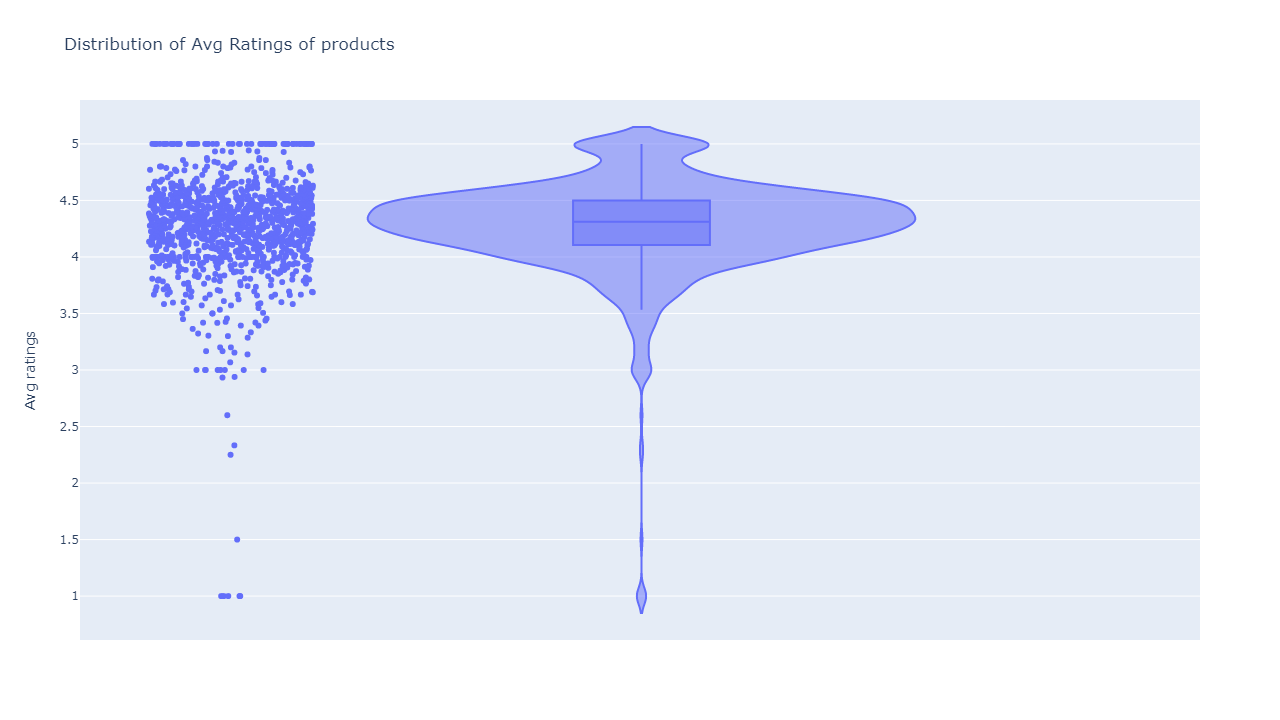

In [7]:
fig=px.violin(df_avg_ratings,
          y = 'avg_rating',
          box=True,
          points='all',
          title = "Distribution of Avg Ratings of products",
          labels=dict(avg_rating='Avg ratings'),
          hover_data=df_avg_ratings
         )
fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Distribution of avg ratings violin.jpeg", width=1280, height=720, engine="kaleido", scale=2)
Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

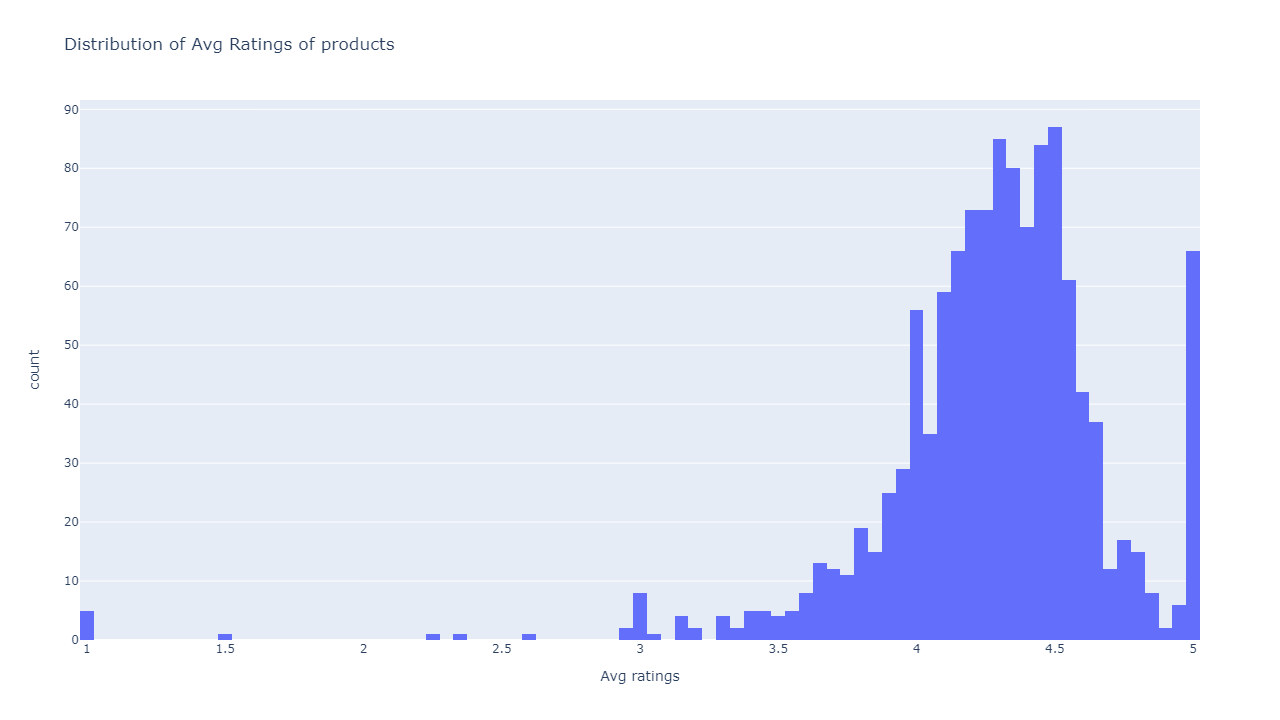

In [8]:
fig=px.histogram(df_avg_ratings,
             x='avg_rating',
             title = "Distribution of Avg Ratings of products",
             labels=dict(avg_rating='Avg ratings'),
             nbins=100,
            )
fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Distribution of avg ratings hist.jpeg", width=1280, height=720, engine="kaleido", scale=2)
Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q3. percentage distribution of each rating

In [9]:
df_rating_count = df[['rating']].value_counts().to_frame().reset_index().rename(columns={0:'count'})
df_rating_count.head()

rating   count
0       5  543285
1       4  182907
2       1   68328
3       3   63282
4       2   21506

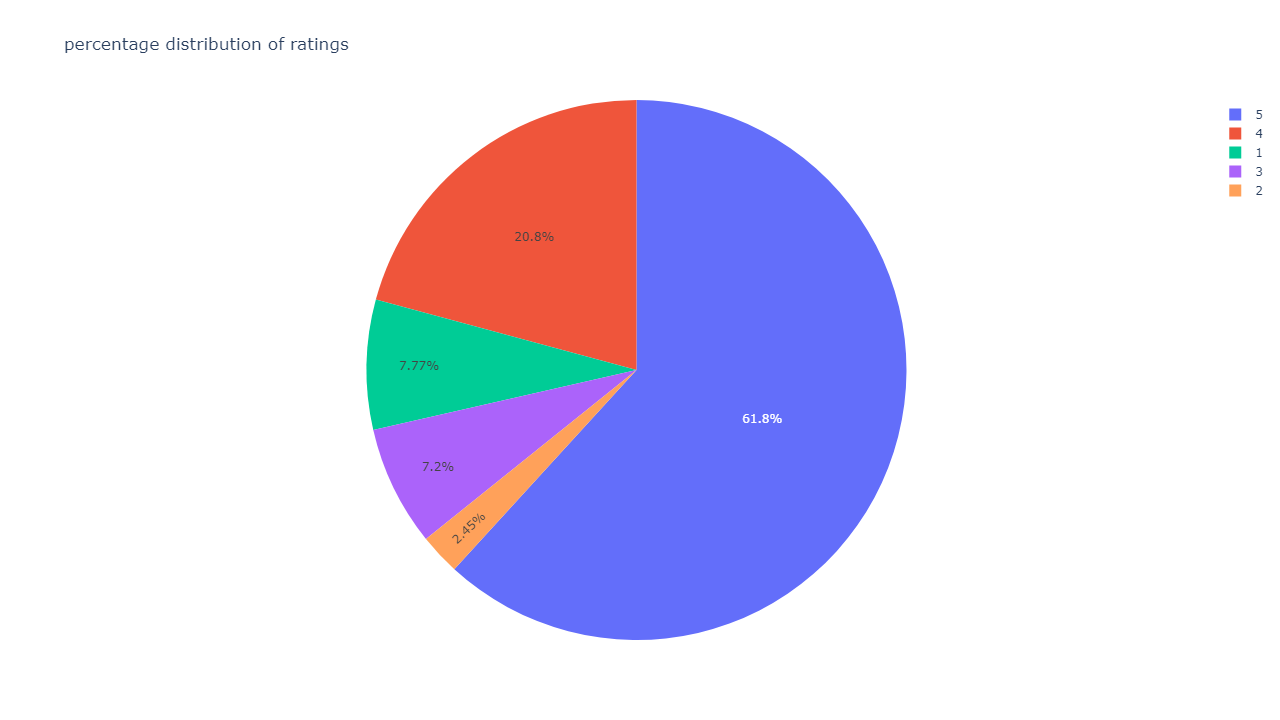

In [10]:
fig = px.pie(df_rating_count, values='count', names='rating',
            title = 'percentage distribution of ratings')

fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\percentage distribution of ratings.jpeg",
                width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q4. How many positive and negative reviews we have in entire dataset

In [11]:
df_polarity = df[['label']].value_counts().to_frame().reset_index().rename(columns={0:'count'})
df_polarity.head()

label   count
0  POSITIVE  696706
1  NEGATIVE  182602

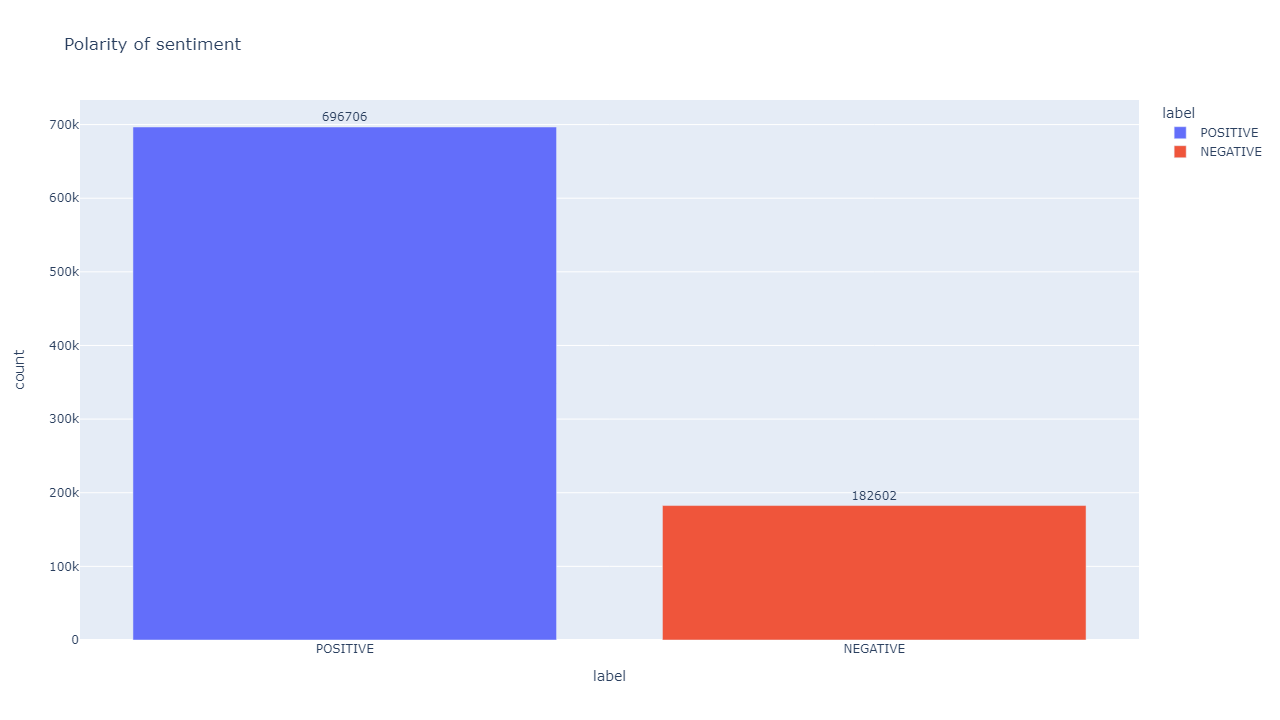

In [12]:
fig = px.bar(df_polarity, x='label',y='count',text='count',color='label',
             title='Polarity of sentiment'
            )
fig.update_layout(legend=dict(title='label'))
fig.update_traces(textposition='outside')

fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Polarity of sentiment.jpeg",
                width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q5. Category specific Sentiment polarity

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [14]:
df['category'].value_counts()

smartphone         477319
water purifier     100965
washing machine     98857
television          77462
refrigerator        60885
air conditioner     40637
laptop              23183
Name: category, dtype: int64

In [15]:
df['label'][df['category']=='smartphone'].value_counts().to_list()

[374993, 102326]

In [16]:
df['label'][df['category']=='water purifier'].value_counts().to_list()

[79422, 21543]

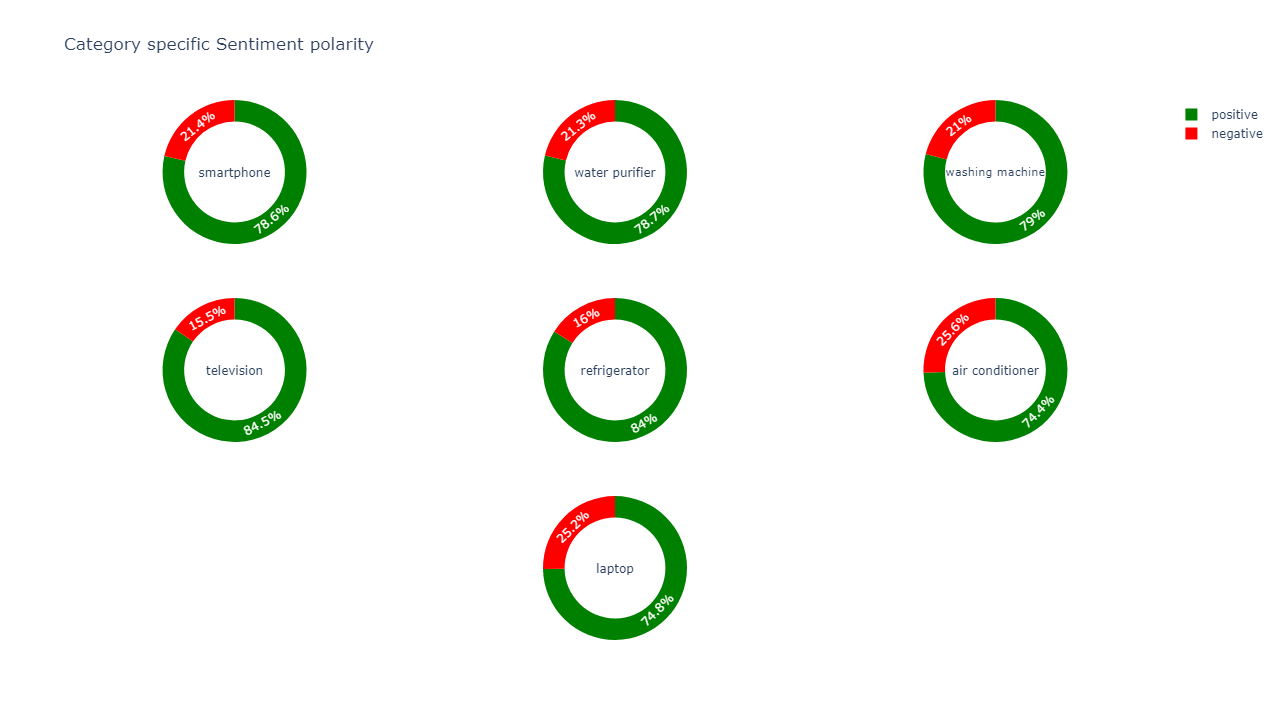

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

colors = ['green','red']


fig = make_subplots(rows=3, cols=3,
                    specs=[
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]
                    ]
                   )


fig.add_trace(go.Pie(
     values=df['label'][df['category']=='smartphone'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="smartphone", title="smartphone",hole=.7,
     marker=dict(colors=colors)),
     row=1, col=1)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='water purifier'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="water purifier", title="water purifier",hole=.7,
     marker=dict(colors=colors)),
     row=1, col=2)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='washing machine'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="washing machine", title="washing machine",hole=.7,
     marker=dict(colors=colors)),
     row=1, col=3)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='television'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="television",title="television",hole=.7,
     marker=dict(colors=colors)),
     row=2, col=1)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='refrigerator'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="refrigerator",title="refrigerator",hole=.7,
     marker=dict(colors=colors)),
     row=2, col=2)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='air conditioner'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="air conditioner",title="air conditioner",hole=.7,
     marker=dict(colors=colors)),
     row=2, col=3)

fig.add_trace(go.Pie(
     values=df['label'][df['category']=='laptop'].value_counts().to_list(),
     labels=["positive", "negative"],
     name="laptop",title="laptop",hole=.7,
     marker=dict(colors=colors)),
     row=3, col=2)



fig['layout'].update(height=800, width=800,
                     title='Category specific Sentiment polarity')
fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Category specific Sentiment polarity.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q6. Customer complaint segmentation

#### We will categorize customers complains into following:
#### 1. Poor Delivery Service
#### 2. Refunds, Returns &  Replacement
#### 3. Wrong product received
#### 4. Misleading price or advertising
#### 5. Faulty product
#### 6. Unsafe product
#### 7. Customer service

In [18]:
df['comment']

0                                  Very good product 🙂🎈🎈🎈🎈🎈
1                                                      nice
2                                                      Good
3         Good product at this price.i am very happy.per...
4                        Worst laptop don't buy this laptop
                                ...                        
879303    Very Nice TV, I recommend you all this TV. Sim...
879304    Worth a penny, excellent tv, punchy colours. P...
879305    Very satisfied with the product so far.  It's ...
879306                                         Good product
879307    Good OLED in less price very slim and Super pi...
Name: comment, Length: 879308, dtype: object

### - We will use https://chat.openai.com to generate words related to each complain categories

### - We will go through each row of negative comment and try to detect related words in it.

In [19]:
# importing A regular expression. 
# The functions in this module let you check if a particular string matches a given regular expression
import re

#### delivery_words

In [28]:
delivery_words = [
    "Delivery",
    "delivered",
    "late",
    "Delayed",
    "time",
    "delay",
    "Shipping fee",
    "delivered late",
    "Mis-delivered",
    "too long",
    "Took too long",
    "never arrived",
    "shipping",
    "shipped",
    "slow shipping",
    "driver error",
    "no tracking",
    "address",
    "incorrect address",
    "no signature",
    "Misdelivery",
    "Incorrect delivery",
    "Faulty delivery",
    "Misaddressed"
]

delivery_words = '|'.join(delivery_words)

In [21]:
delivery_words

'Delivery|delivered|late|Delayed|time|delay|Shipping fee|delivered late|Mis-delivered|too long|Took too long|never arrived|shipping|shipped|slow shipping|driver error|no tracking|address|incorrect address|no signature|Misdelivery|Incorrect delivery|Faulty delivery|Misaddressed'

#### Refunds_Returns_Replacement_words

In [29]:
Refunds_Returns_Replacement_words = [
    "Cancellation",
    "Cancel",
    "Canceled",
    "Refund",
    "Refunded",
    "Refund request",
    "Return",
    "Returned",
    "Returning",
    "Replace",
    "Replaced",
    "Replacement",
    "Processing",
    "Exchange",
    "Return shipping",
    "RMA",
    "Money",
]
Refunds_Returns_Replacement_words = '|'.join(Refunds_Returns_Replacement_words)

In [30]:
Refunds_Returns_Replacement_words

'Cancellation|Cancel|Canceled|Refund|Refunded|Refund request|Return|Returned|Returning|Replace|Replaced|Replacement|Processing|Exchange|Return shipping|RMA|Money'

#### Wrong_product_received_words

In [31]:
Wrong_product_received_words = [
    "different product",
    "wrong products",
    "Misrouted",
    "Mis-shipped",
    "Wrong package",
    "Misleading",
    "does not match",
    "wrong product",
    "Incorrect",
    "Inaccurate",
    "Misdelivered",
    "Unmatched",
    "Unfit",
    "not fitting",
    "Inappropriate",
    "Misaligned",
    "Misrepresented",
]
Wrong_product_received_words = '|'.join(Wrong_product_received_words)

In [32]:
Wrong_product_received_words

'different product|wrong products|Misrouted|Mis-shipped|Wrong package|Misleading|does not match|wrong product|Incorrect|Inaccurate|Misdelivered|Unmatched|Unfit|not fitting|Inappropriate|Misaligned|Misrepresented'

#### Misleading_price_advertising_words

In [33]:
Misleading_price_advertising_words = [
    "not as mentioned",
    "specs are diff",
    "not same as",
    "Misrepresented",
    "Imitation",
    "Knockoff",
    "advertised",
    "Bogus",
    "not as",
    "advertising",
    "description",
    "descriptions",
    "information",
    "speciation",
    "speciations",
    "Misleading",
    "fake",
    "price",
    "False advertising",
    "incorrect",
    "incorrect pricing",
    "incorrect information",
    "Mispriced",
    "price is not",
    "Overpriced",
    "Misinformative",
    "scam"
]
Misleading_price_advertising_words = '|'.join(Misleading_price_advertising_words)

In [34]:
Misleading_price_advertising_words

'not as mentioned|specs are diff|not same as|Misrepresented|Imitation|Knockoff|advertised|Bogus|not as|advertising|description|descriptions|information|speciation|speciations|Misleading|fake|price|False advertising|incorrect|incorrect pricing|incorrect information|Mispriced|price is not|Overpriced|Misinformative|scam'

#### Faulty_product_words

In [35]:
Faulty_product_words = [
    "not working",
    "Defective",
    "Damaged",
    "Broken",
    "Faulty",
    "Malfunctioning",
    "Unusable",
    "not functioning",
    "Quality",
    "insufficient",
    "brittle",
    "noise",
    "heating",
    "loud",
    "overheate",
    "Water damage",
    "Audio",
    "Display",
    "Connectivity",
    "Software",
    "Hardware",
    "Power issue",
    "charging",
    "battery life",
    "cracks",
    "crashes",
    "screen",
    "dead pixels",
    "speaker",
    "microphone",
    "too hot",
    "liquid",
    "failure",
    "Leakage",
    "Touch pad",
    "Battery backup",
    "worst product"
]
Faulty_product_words = '|'.join(Faulty_product_words)

In [36]:
Faulty_product_words

'not working|Defective|Damaged|Broken|Faulty|Malfunctioning|Unusable|not functioning|Quality|insufficient|brittle|noise|heating|loud|overheate|Water damage|Audio|Display|Connectivity|Software|Hardware|Power issue|charging|battery life|cracks|crashes|screen|dead pixels|speaker|microphone|too hot|liquid|failure|Leakage|Touch pad|Battery backup|worst product'

#### unsafe_product_words

In [37]:
unsafe_product_words = [
    "killing machine",
    "Choking",
    "toxins",
    "gas leak",
    "gas",
    "chemical",
    "Sharp",
    "Dangerous",
    "deadly",
    "horror",
    "Risky",
    "Hazardous",
    "Unsafe",
    "Injurious",
    "harmful",
    "Poisonous",
    "Toxic",
    "Flammable",
    "Explosive",
    "Electrical shock",
    "Unpredictable"
]
unsafe_product_words = '|'.join(unsafe_product_words)

In [38]:
unsafe_product_words

'killing machine|Choking|toxins|gas leak|gas|chemical|Sharp|Dangerous|deadly|horror|Risky|Hazardous|Unsafe|Injurious|harmful|Poisonous|Toxic|Flammable|Explosive|Electrical shock|Unpredictable'

#### Customer_service_words

In [39]:
Customer_service_words = [
    "service",
    "care",
    "customercare",
    "help",
    "customer",
    "customer service",
    "Warranty",
    "Guarantee",
    "policy",
    "claim",
    "repair",
    "Unhelpful",
    "support",
    "helpful",
    "rude",
    "Warranty scam",
    "disclaimer",
    "professional",
    "behaviour",
    "Unresponsive",
    "they Ignored",
    "Arrogant",
    "terms and conditions",
    "Unwilling",
    "registration",
    "Uncooperative",
    "cooperative",
    "Unfriendly",
    "friendly"
]
Customer_service_words = '|'.join(Customer_service_words)

In [40]:
Customer_service_words

'service|care|customercare|help|customer|customer service|Warranty|Guarantee|policy|claim|repair|Unhelpful|support|helpful|rude|Warranty scam|disclaimer|professional|behaviour|Unresponsive|they Ignored|Arrogant|terms and conditions|Unwilling|registration|Uncooperative|cooperative|Unfriendly|friendly'

### Creating new feature "complain type" and adding respective values in it

In [41]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  purchase_month  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...         January   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...         January   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...         January   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...         January   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...         January   

  purchase_year                                     short_name  \
0          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4          2023  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label sent_score  
0     West Bengal  25000-50000 ₹  POSITIVE   0.999839  
1       Jharkhand  25000-50000 ₹  POSITIVE   0.999855  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE   0.999816  
3       Telangana  25000-50000 ₹  POSITIVE   0.999848  
4       Karnataka  25000-50000 ₹  NEGATIVE   0.999649  

[5 rows x 23 columns]

In [43]:
# initiated new column by nan
df['complain_type'] = np.nan

In [44]:
# positive reviews will have value no complaint
df['complain_type'][df['label']=='POSITIVE'] = 'no complaint'

In [45]:
# negative but unidentified complain category will have value unidentified complaint
df['complain_type'][df['label']=='NEGATIVE'] = 'unidentified complaint'

In [46]:
# issue with delivery
df['complain_type'][(df['comment'].str.contains(delivery_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'delivery'

In [47]:
# issue with Refunds/Returns/Replacement
df['complain_type'][(df['comment'].str.contains(Refunds_Returns_Replacement_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'Refunds/Returns/Replacement'

In [48]:
# issue with Wrong product received
df['complain_type'][(df['comment'].str.contains(Wrong_product_received_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'Wrong product received'

In [49]:
# issue with Misleading price/advertising
df['complain_type'][(df['comment'].str.contains(Misleading_price_advertising_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'Misleading price/advertising'

In [50]:
# issue with Faulty product
df['complain_type'][(df['comment'].str.contains(Faulty_product_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'Faulty product'

In [51]:
# issue with unsafe product
df['complain_type'][(df['comment'].str.contains(unsafe_product_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'unsafe product'

In [52]:
# issue with Customer service
df['complain_type'][(df['comment'].str.contains(Customer_service_words, case=False, regex=True)) & (df['label']=='NEGATIVE')] = 'Customer service'

### Saving new features into csv as checkpoint

In [54]:
df.to_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_added_sentiments_reviews2.csv", index=False)

### Lets see final results

In [2]:
df = pd.read_csv(r"D:\flipkart reviews\all csv combine\added_coordinates_added_sentiments_reviews2.csv")

In [3]:
df[['comment','complain_type']].head(10)

comment           complain_type
0                           Very good product 🙂🎈🎈🎈🎈🎈            no complaint
1                                               nice            no complaint
2                                               Good            no complaint
3  Good product at this price.i am very happy.per...            no complaint
4                 Worst laptop don't buy this laptop  unidentified complaint
5  Product is good but need a backlit keyboard at...            no complaint
6  Everything is fine with laptop. Only 1 thing i...        Customer service
7                                          Very good            no complaint
8  Was torn between Asus Vivobook 15 and this one...            no complaint
9  Touch pad is not working from day 2.Delay occu...          Faulty product

In [4]:
df_complaints_count = df['complain_type'][df['label']=='NEGATIVE'].value_counts().to_frame().reset_index()
df_complaints_count.columns = ['complain_type' , 'count']

In [5]:
df_complaints_count

complain_type  count
0        unidentified complaint  84743
1                Faulty product  52159
2              Customer service  16303
3   Refunds/Returns/Replacement  14852
4                      delivery   7514
5  Misleading price/advertising   6594
6                unsafe product    407
7        Wrong product received     30

## 7. Distribution of types of complaints

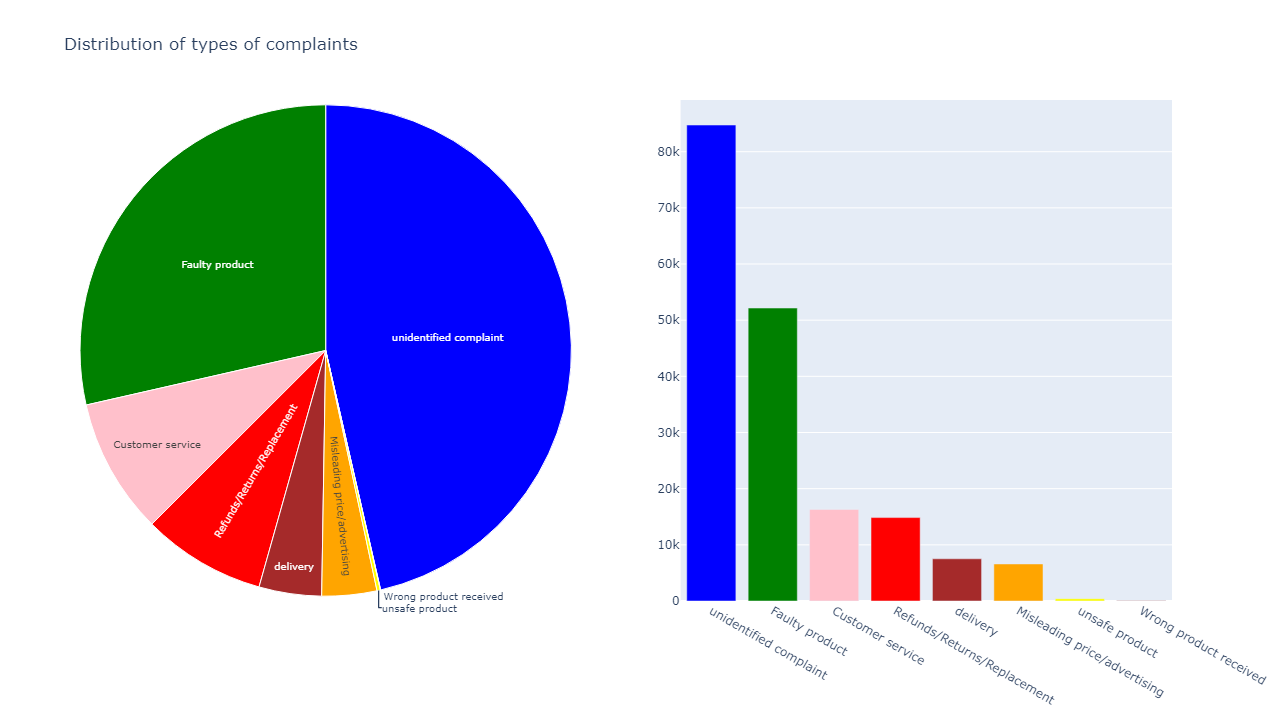

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

colors = ['blue', 'green', 'pink', 'red', 'brown', 'orange', 'yellow', 'maroon','black']
fig = make_subplots(rows=1, cols=2,
                    specs=[
                        [{"type": "pie"},{"type": "bar"}],
                    ]
                   )


fig.add_trace(go.Pie(
     values=df_complaints_count['count'].to_list(),
     labels=df_complaints_count['complain_type'].to_list(),
     marker=dict(colors=colors),showlegend=False),
     row=1, col=1)
fig.update_traces(hoverinfo='label+percent', textfont_size=10,
                 textinfo='label',
                 pull=[0,0,0,0,0,0],
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Bar(
    x=df_complaints_count['complain_type'],
    y=df_complaints_count['count'],
    marker=dict(color=colors),
    showlegend=False),
    row=1, col=2)

fig['layout'].update(height=500, width=1000,
                     title='Distribution of types of complaints')
fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Distribution of types of complaints.jpeg",
                width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q8. Product category specific complaints types

In [7]:
df_complaints = df[df['label']=='NEGATIVE']

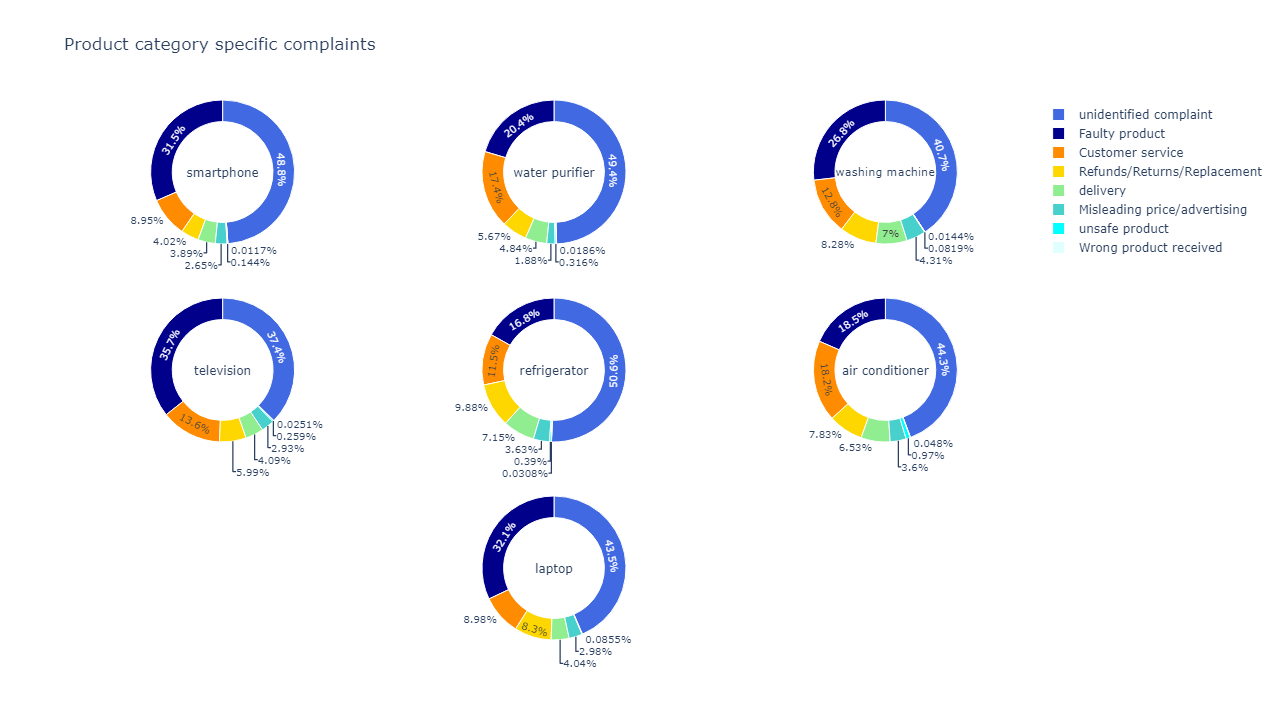

In [8]:
colors = ['royalblue','darkblue','darkorange','gold','lightgreen','mediumturquoise','cyan','lightcyan']

fig = make_subplots(rows=3, cols=3,
                    specs=[
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
                        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]
                    ]
                   )


fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=='smartphone'].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="smartphone", title="smartphone",hole=.7,marker=dict(colors=colors)),
     row=1, col=1)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=='water purifier'].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="water purifier", title="water purifier",hole=.7,marker=dict(colors=colors)),
     row=1, col=2)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=="washing machine"].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="washing machine", title="washing machine",hole=.7,marker=dict(colors=colors)),
     row=1, col=3)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=="television"].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="television", title="television",hole=.7,marker=dict(colors=colors)),
     row=2, col=1)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=="refrigerator"].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="refrigerator", title="refrigerator",hole=.7,marker=dict(colors=colors)),
     row=2, col=2)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=="air conditioner"].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="air conditioner", title="air conditioner",hole=.7,marker=dict(colors=colors)),
     row=2, col=3)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )

fig.add_trace(go.Pie(
     values=df_complaints['complain_type'][df_complaints['category']=="laptop"].value_counts().to_list(),
     labels=["unidentified complaint", "Faulty product", "Customer service","Refunds/Returns/Replacement",
             "delivery","Misleading price/advertising","unsafe product","Wrong product received"],
     name="laptop", title="laptop",hole=.7,marker=dict(colors=colors)),
     row=3, col=2)
fig.update_traces(hoverinfo='percent', textfont_size=10,
                 marker=dict(line=dict(color='#FFFFFF', width=1))
                 )



fig['layout'].update(height=800, width=800,
                     title='Product category specific complaints')
fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Product category specific complaints.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

# 2. Analysis of Product specific Reviews

In [9]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Q9. segmentation of customers reviews

In [10]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  purchase_year  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...           2023   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...           2023   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...           2023   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...           2023   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...           2023   

                                      short_name  \
0  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label  sent_score           complain_type  
0     West Bengal  25000-50000 ₹  POSITIVE    0.999839            no complaint  
1       Jharkhand  25000-50000 ₹  POSITIVE    0.999855            no complaint  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE    0.999816            no complaint  
3       Telangana  25000-50000 ₹  POSITIVE    0.999848            no complaint  
4       Karnataka  25000-50000 ₹  NEGATIVE    0.999649  unidentified complaint  

[5 rows x 24 columns]

In [11]:
df_complaints_count

complain_type  count
0        unidentified complaint  84743
1                Faulty product  52159
2              Customer service  16303
3   Refunds/Returns/Replacement  14852
4                      delivery   7514
5  Misleading price/advertising   6594
6                unsafe product    407
7        Wrong product received     30

In [12]:
df_reviews = df['product_name'].value_counts().to_frame().reset_index()
df_reviews.columns = ['product_name', 'total_reviews']

df_total_compl =  df[['product_name']][df['label']=='NEGATIVE'].value_counts().reset_index()
df_total_compl.columns = ['product_name', 'total_complaints']

df_unidentified_compl =  df[['product_name']][df['complain_type']=='unidentified complaint'].value_counts().reset_index()
df_unidentified_compl.columns = ['product_name', 'unidentified complaint']

df_Faulty_compl =  df[['product_name']][df['complain_type']=='Faulty product'].value_counts().reset_index()
df_Faulty_compl.columns = ['product_name', 'Faulty product']

df_Customer_compl =  df[['product_name']][df['complain_type']=='Customer service'].value_counts().reset_index()
df_Customer_compl.columns = ['product_name', 'Customer service']

df_rrr_compl =  df[['product_name']][df['complain_type']=='Refunds/Returns/Replacement'].value_counts().reset_index()
df_rrr_compl.columns = ['product_name', 'Refunds/Returns/Replacement']

df_dlv_compl =  df[['product_name']][df['complain_type']=='delivery'].value_counts().reset_index()
df_dlv_compl.columns = ['product_name', 'delivery_complaints']

df_Misleading_compl =  df[['product_name']][df['complain_type']=='Misleading price/advertising'].value_counts().reset_index()
df_Misleading_compl.columns = ['product_name', 'Misleading price/advertising']

df_unsafe_compl =  df[['product_name']][df['complain_type']=='unsafe product'].value_counts().reset_index()
df_unsafe_compl.columns = ['product_name', 'unsafe product']

df_Wrong_compl =  df[['product_name']][df['complain_type']=='Wrong product received'].value_counts().reset_index()
df_Wrong_compl.columns = ['product_name', 'Wrong product received']


In [13]:
df_reviews = df_reviews.merge(df_total_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_unidentified_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_Faulty_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_Customer_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_rrr_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_dlv_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_Misleading_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_unsafe_compl,on='product_name',how='left')
df_reviews = df_reviews.merge(df_Wrong_compl,on='product_name',how='left')

### lets see our final table

In [14]:
df_reviews.head(10)

product_name  total_reviews  \
0                REDMI 9i Sport (Coral Green, 64 GB)           9500   
1             SAMSUNG Galaxy F22 (Denim Blue, 64 GB)           9480   
2  OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...           9299   
3        SAMSUNG Galaxy S21 FE 5G (Lavender, 128 GB)           7512   
4  Thomson OATHPRO Max 126 cm (50 inch) Ultra HD ...           7217   
5              MOTOROLA g52 (Metallic White, 128 GB)           6164   
6               APPLE iPhone 12 mini (Black, 128 GB)           6059   
7                APPLE iPhone 12 mini (White, 64 GB)           6024   
8  IFB 6 kg 5 Star 2X Power Steam,Hard Water Wash...           5859   
9  MarQ by Flipkart 6 kg 5 Star Rating Semi Autom...           5815   

   total_complaints  unidentified complaint  Faulty product  Customer service  \
0            1449.0                   841.0           338.0              38.0   
1            1668.0                   791.0           541.0              77.0   
2            1361.0                   561.0           497.0             147.0   
3            2402.0                   874.0          1137.0             120.0   
4            1068.0                   280.0           434.0             214.0   
5            1931.0                   661.0           852.0             109.0   
6            1195.0                   583.0           401.0              52.0   
7            1194.0                   583.0           401.0              52.0   
8            1450.0                   533.0           241.0             310.0   
9            1161.0                   525.0           328.0              89.0   

   Refunds/Returns/Replacement  delivery_complaints  \
0                        120.0                 46.0   
1                        146.0                 36.0   
2                         78.0                 53.0   
3                        138.0                 58.0   
4                         71.0                 26.0   
5                        172.0                 45.0   
6                         91.0                 28.0   
7                         91.0                 28.0   
8                        126.0                183.0   
9                        111.0                 52.0   

   Misleading price/advertising  unsafe product  Wrong product received  
0                          66.0             NaN                     NaN  
1                          72.0             5.0                     NaN  
2                          22.0             2.0                     1.0  
3                          72.0             3.0                     NaN  
4                          43.0             NaN                     NaN  
5                          82.0            10.0                     NaN  
6                          39.0             1.0                     NaN  
7                          38.0             1.0                     NaN  
8                          56.0             1.0                     NaN  
9                          54.0             2.0                     NaN

## Q10. Which product have more negative reviews in ratio with its total reviews?

In [15]:
positive_negative= df_reviews[['product_name','total_reviews','total_complaints']][df_reviews['total_reviews']>10].dropna()

In [16]:
positive_negative['ratio']=positive_negative['total_complaints'].div(positive_negative['total_reviews'])

In [17]:
positive_negative.head()

product_name  total_reviews  \
0                REDMI 9i Sport (Coral Green, 64 GB)           9500   
1             SAMSUNG Galaxy F22 (Denim Blue, 64 GB)           9480   
2  OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...           9299   
3        SAMSUNG Galaxy S21 FE 5G (Lavender, 128 GB)           7512   
4  Thomson OATHPRO Max 126 cm (50 inch) Ultra HD ...           7217   

   total_complaints     ratio  
0            1449.0  0.152526  
1            1668.0  0.175949  
2            1361.0  0.146360  
3            2402.0  0.319755  
4            1068.0  0.147984

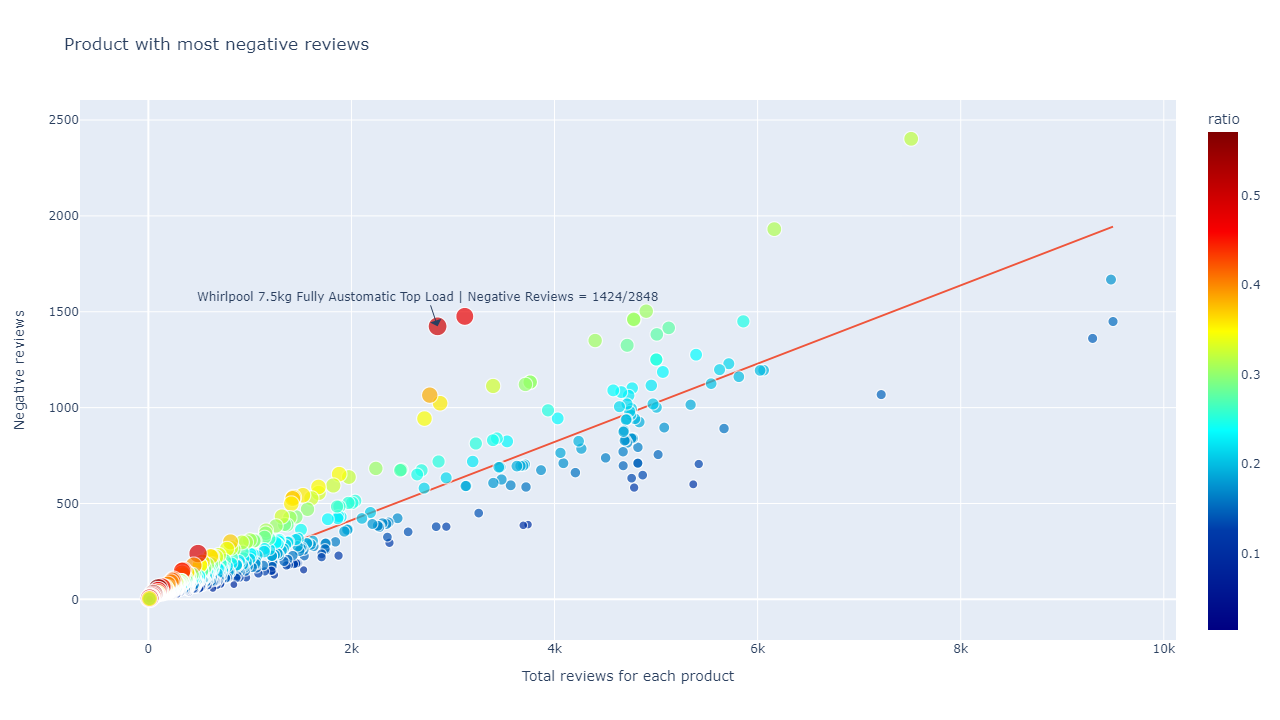

In [18]:
fig = px.scatter(positive_negative,
                 x='total_reviews',
                 y='total_complaints',
                 hover_name='product_name',
                 color='ratio',
                 color_continuous_scale='Jet',
                 size='ratio',
                 size_max=20,
                 trendline="ols",
                 trendline_scope="overall",
                 title='Product with most negative reviews'
                )
fig.update_layout(xaxis_title='Total reviews for each product',yaxis_title='Negative reviews')
fig.update_layout(showlegend=False)


fig.add_annotation(x=2848,y=1424,arrowhead=1,arrowsize=2,
                   text='Whirlpool 7.5kg Fully Austomatic Top Load | Negative Reviews = 1424/2848',
                   showarrow=True,
                  )


fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Product with most negative reviews.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

### Word Cloud of most Badly reviewed product

In [19]:
badly_reviewed_product = df_reviews['product_name'][(df_reviews['total_reviews']==2848)&(df_reviews['total_complaints']==1424)].to_list()[0]
badly_reviewed_product

'Whirlpool 7.5 kg Fully Automatic Top Load with In-built Heater Grey'

In [20]:
POSITIVE_comments = df['comment'][(df['rating']>3)&(df['product_name']==badly_reviewed_product)]
NEGATIVE_comments = df['comment'][(df['rating']<4)&(df['product_name']==badly_reviewed_product)]

In [21]:
POSITIVE_comments

870609                                                 Nice
870610    Reviewing after using 4th time...Not as good i...
870611    Washing machine performance too good design no...
870612                                                 Good
870615    Everything seems good except the machine shake...
                                ...                        
873450    Reviewing after using 4th time...Not as good i...
873451    Washing machine performance too good design no...
873452                                                 Good
873455    Everything seems good except the machine shake...
873456    Product review to come later, but delivery and...
Name: comment, Length: 2136, dtype: object

In [22]:
NEGATIVE_comments

870613    Have deducted two stars due to installation gu...
870614    Worth less .... This this wost machine i even ...
870621    Have deducted two stars due to installation gu...
870622    Worth less .... This this wost machine i even ...
870629    Have deducted two stars due to installation gu...
                                ...                        
873438    Worth less .... This this wost machine i even ...
873445    Have deducted two stars due to installation gu...
873446    Worth less .... This this wost machine i even ...
873453    Have deducted two stars due to installation gu...
873454    Worth less .... This this wost machine i even ...
Name: comment, Length: 712, dtype: object

In [23]:
POSITIVE_comments_joined = ' '.join(POSITIVE_comments)
NEGATIVE_comments_joined = ' '.join(NEGATIVE_comments)

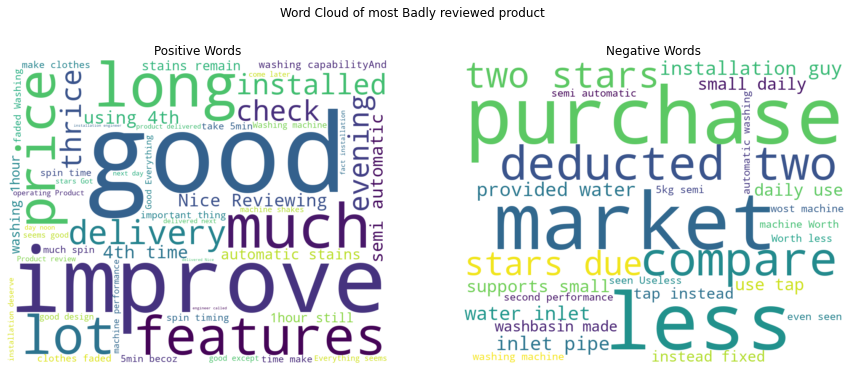

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Creating figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# adding a title to the whole figure
plt.suptitle("Word Cloud of most Badly reviewed product")

wc1 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(POSITIVE_comments_joined)
wc2 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(NEGATIVE_comments_joined)

# Plot wordcloud 1
axs[0].imshow(wc1, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("Positive Words")

# Plot wordcloud 2
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("Negative Words")
    

# Show plot
plt.savefig(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Word Cloud of most Badly reviewed product.jpeg",
            dpi=100, facecolor='w', edgecolor='w',
            orientation='portrait',transparent=False)


plt.show()

## Q11. Which Product is most faulty according to customers?

In [27]:
faulty = df_reviews[['product_name','total_reviews','Faulty product']][df_reviews['total_reviews']>10].dropna()

In [28]:
faulty['ratio']=faulty['Faulty product'].div(faulty['total_reviews'])
faulty.head()

product_name  total_reviews  \
0                REDMI 9i Sport (Coral Green, 64 GB)           9500   
1             SAMSUNG Galaxy F22 (Denim Blue, 64 GB)           9480   
2  OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...           9299   
3        SAMSUNG Galaxy S21 FE 5G (Lavender, 128 GB)           7512   
4  Thomson OATHPRO Max 126 cm (50 inch) Ultra HD ...           7217   

   Faulty product     ratio  
0           338.0  0.035579  
1           541.0  0.057068  
2           497.0  0.053447  
3          1137.0  0.151358  
4           434.0  0.060136

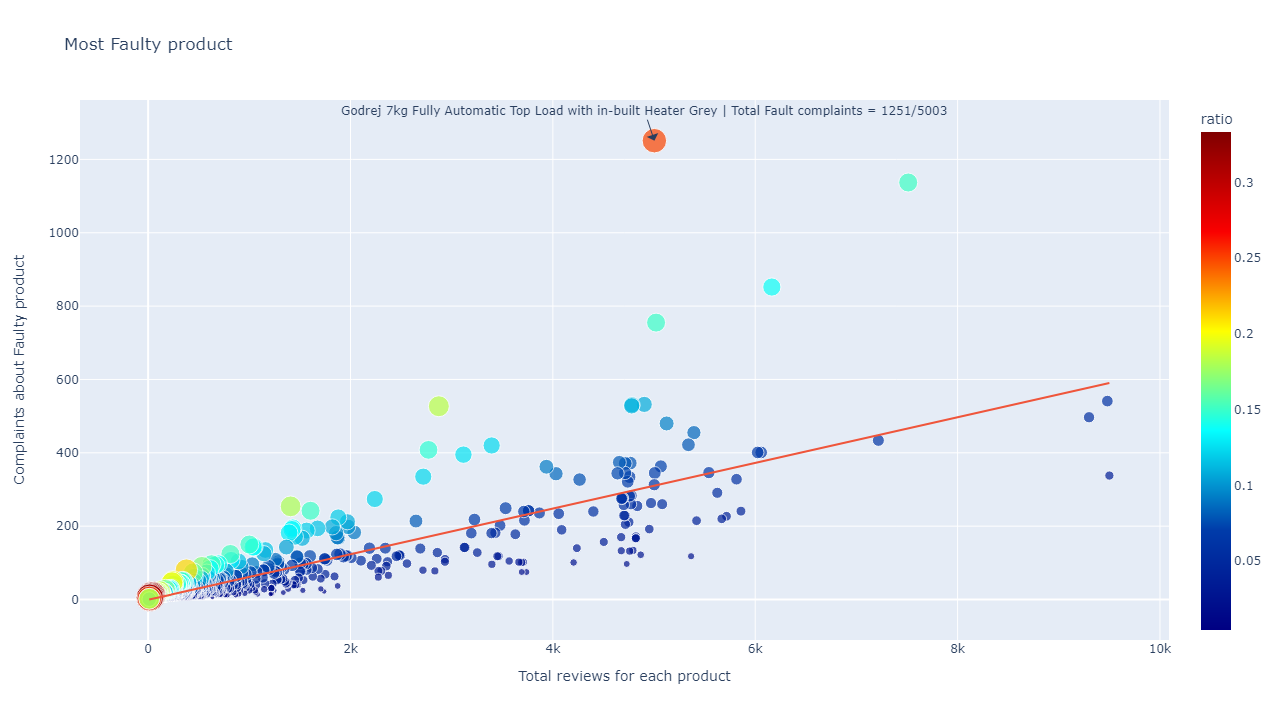

In [29]:
fig = px.scatter(faulty,
                 x='total_reviews',
                 y='Faulty product',
                 hover_name='product_name',
                 color='ratio',
                 color_continuous_scale='Jet',
                 size='ratio',
                 size_max=20,
                 trendline="ols",
                 trendline_scope="overall",
                 title='Most Faulty product'
                )
fig.update_layout(xaxis_title='Total reviews for each product',yaxis_title='Complaints about Faulty product')
fig.update_layout(showlegend=False)


fig.add_annotation(x=5003,y=1251,arrowhead=1,arrowsize=2,
                   text='Godrej 7kg Fully Automatic Top Load with in-built Heater Grey | Total Fault complaints = 1251/5003',
                   showarrow=True,
                  )


fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Most Faulty product.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

### WordCloud of most Faulty products reviews

In [30]:
most_faulty_product_by_reviews = df_reviews['product_name'][(df_reviews['total_reviews']==5003)&(df_reviews['Faulty product']==1251)].to_list()[0]
most_faulty_product_by_reviews                               

'Godrej 7 kg Fully Automatic Top Load with In-built Heater Grey'

In [31]:
POSITIVE_comments = df['comment'][(df['label']=='POSITIVE')&(df['product_name']==most_faulty_product_by_reviews)]
NEGATIVE_comments = df['comment'][(df['complain_type']=='Faulty product')&(df['product_name']==most_faulty_product_by_reviews)]

In [32]:
POSITIVE_comments_joined = ' '.join(POSITIVE_comments)
NEGATIVE_comments_joined = ' '.join(NEGATIVE_comments)

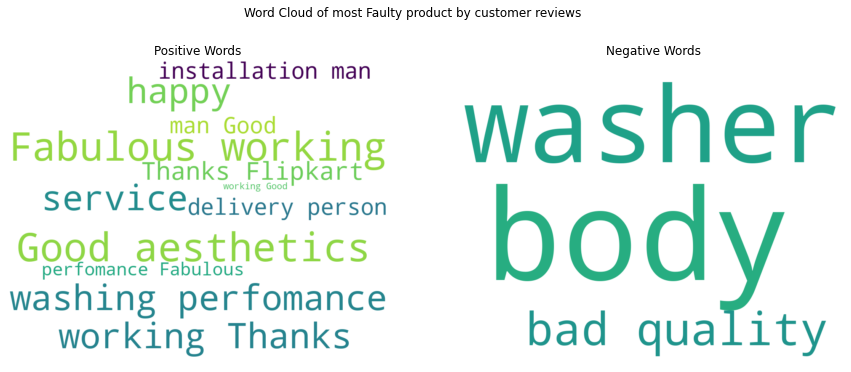

In [35]:
# Creating figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# adding a title to the whole figure
plt.suptitle("Word Cloud of most Faulty product by customer reviews")

wc1 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(POSITIVE_comments_joined)
wc2 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(NEGATIVE_comments_joined)

# Plot wordcloud 1
axs[0].imshow(wc1, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("Positive Words")

# Plot wordcloud 2
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("Negative Words")
    

# Show plot
plt.savefig(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Word Cloud of most Faulty product by customer reviews.jpeg",
            dpi=100, facecolor='w', edgecolor='w',
            orientation='portrait',transparent=False)


plt.show()

## Q12. Which product have Customer service issue?

In [36]:
Customer_service = df_reviews[['product_name','total_reviews','Customer service']][df_reviews['total_reviews']>20].dropna()

In [37]:
Customer_service['ratio']=Customer_service['Customer service'].div(Customer_service['total_reviews'])
Customer_service.head()

product_name  total_reviews  \
0                REDMI 9i Sport (Coral Green, 64 GB)           9500   
1             SAMSUNG Galaxy F22 (Denim Blue, 64 GB)           9480   
2  OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...           9299   
3        SAMSUNG Galaxy S21 FE 5G (Lavender, 128 GB)           7512   
4  Thomson OATHPRO Max 126 cm (50 inch) Ultra HD ...           7217   

   Customer service     ratio  
0              38.0  0.004000  
1              77.0  0.008122  
2             147.0  0.015808  
3             120.0  0.015974  
4             214.0  0.029652

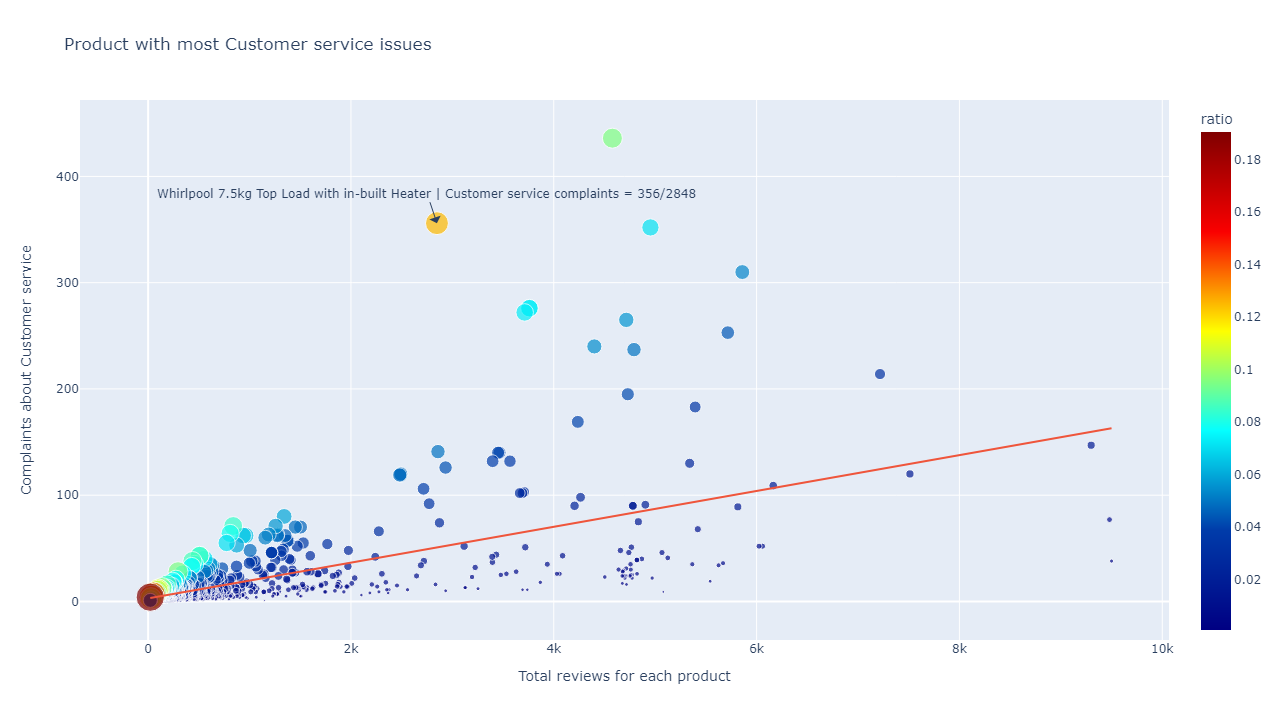

In [38]:
fig = px.scatter(Customer_service,
                 x='total_reviews',
                 y='Customer service',
                 hover_name='product_name',
                 color='ratio',
                 color_continuous_scale='Jet',
                 size='ratio',
                 size_max=20,
                 trendline="ols",
                 trendline_scope="overall",
                 title='Product with most Customer service issues'
                )
fig.update_layout(xaxis_title='Total reviews for each product',yaxis_title='Complaints about Customer service')
fig.update_layout(showlegend=False)


fig.add_annotation(x=2848,y=356,arrowhead=1,arrowsize=2,
                   text='Whirlpool 7.5kg Top Load with in-built Heater | Customer service complaints = 356/2848',
                   showarrow=True,
                  )


fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Product with most Customer service issues.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

### WordCloud of product with Customer service issue

In [39]:
product_with_most_Customer_service_issue_by_reviews = df_reviews['product_name'][(df_reviews['total_reviews']==2848)&(df_reviews['Customer service']==356)].to_list()[0]
product_with_most_Customer_service_issue_by_reviews                               

'Whirlpool 7.5 kg Fully Automatic Top Load with In-built Heater Grey'

In [40]:
POSITIVE_comments = df['comment'][(df['label']=='POSITIVE')&(df['product_name']==product_with_most_Customer_service_issue_by_reviews)]
NEGATIVE_comments = df['comment'][(df['complain_type']=='Customer service')&(df['product_name']==product_with_most_Customer_service_issue_by_reviews)]

In [41]:
POSITIVE_comments_joined = ' '.join(POSITIVE_comments)
NEGATIVE_comments_joined = ' '.join(NEGATIVE_comments)

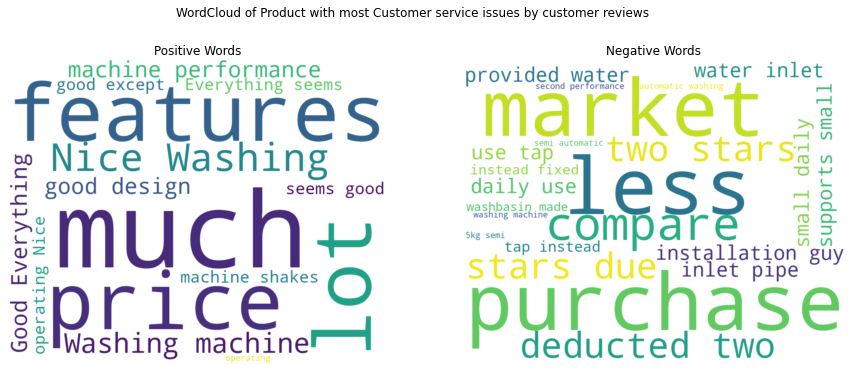

In [42]:
# Creating figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# adding a title to the whole figure
plt.suptitle("WordCloud of Product with most Customer service issues by customer reviews")

wc1 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(POSITIVE_comments_joined)
wc2 = WordCloud(stopwords=set(STOPWORDS),background_color='white', width=1000, height=800).generate(NEGATIVE_comments_joined)

# Plot wordcloud 1
axs[0].imshow(wc1, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("Positive Words")

# Plot wordcloud 2
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("Negative Words")
    

# Show plot
plt.savefig(r"C:\Users\sumit\End_To_End_DataAnalysis\images\WordCloud of Product with most Customer service issues by customer reviews.jpeg",
            dpi=100, facecolor='w', edgecolor='w',
            orientation='portrait',transparent=False)


plt.show()

# 3. Demographic Insights

## Q13. Which customer locations have most delivery issues

In [43]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date    customers_city  ...  purchase_year  \
0    Flipkart Customer    2023-01-01   Karimpur, India  ...           2023   
1    Flipkart Customer    2023-01-01     Ranchi, India  ...           2023   
2       Dhiraj Jaiswal    2023-01-01      Sidhi, India  ...           2023   
3  Vasamsetti Durgayya    2023-01-01  Hyderabad, India  ...           2023   
4    Flipkart Customer    2023-01-01  Bengaluru, India  ...           2023   

                                      short_name  \
0  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label  sent_score           complain_type  
0     West Bengal  25000-50000 ₹  POSITIVE    0.999839            no complaint  
1       Jharkhand  25000-50000 ₹  POSITIVE    0.999855            no complaint  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE    0.999816            no complaint  
3       Telangana  25000-50000 ₹  POSITIVE    0.999848            no complaint  
4       Karnataka  25000-50000 ₹  NEGATIVE    0.999649  unidentified complaint  

[5 rows x 24 columns]

In [44]:
def locs(customers_city):
    loc = customers_city.replace(', India', '')
    return loc

In [45]:
df['customers_city'] = df['customers_city'].map(locs)

In [46]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date customers_city  ...  purchase_year  \
0    Flipkart Customer    2023-01-01       Karimpur  ...           2023   
1    Flipkart Customer    2023-01-01         Ranchi  ...           2023   
2       Dhiraj Jaiswal    2023-01-01          Sidhi  ...           2023   
3  Vasamsetti Durgayya    2023-01-01      Hyderabad  ...           2023   
4    Flipkart Customer    2023-01-01      Bengaluru  ...           2023   

                                      short_name  \
0  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label  sent_score           complain_type  
0     West Bengal  25000-50000 ₹  POSITIVE    0.999839            no complaint  
1       Jharkhand  25000-50000 ₹  POSITIVE    0.999855            no complaint  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE    0.999816            no complaint  
3       Telangana  25000-50000 ₹  POSITIVE    0.999848            no complaint  
4       Karnataka  25000-50000 ₹  NEGATIVE    0.999649  unidentified complaint  

[5 rows x 24 columns]

In [47]:
loc_wise_reviews = df['customers_city'].value_counts().to_frame().reset_index()
loc_wise_reviews.columns=['customers_city','total_reviews']
loc_wise_reviews.head()

customers_city  total_reviews
0      Bengaluru          38590
1      New Delhi          32254
2      Hyderabad          27455
3        Chennai          20925
4         Mumbai          13833

In [48]:
loc_wise_dlvry_compl = df['customers_city'][df['complain_type']=='delivery'].value_counts().to_frame().reset_index()
loc_wise_dlvry_compl.columns=['customers_city','delivery_complaints']
loc_wise_dlvry_compl.head()

customers_city  delivery_complaints
0      Bengaluru                  499
1           Pune                  488
2      Hyderabad                  342
3      New Delhi                  235
4        Chennai                  221

In [49]:
df_most_dlv_compl = loc_wise_reviews.merge(loc_wise_dlvry_compl, on='customers_city', how='left').dropna()

In [50]:
df_most_dlv_compl.head()

customers_city  total_reviews  delivery_complaints
0      Bengaluru          38590                499.0
1      New Delhi          32254                235.0
2      Hyderabad          27455                342.0
3        Chennai          20925                221.0
4         Mumbai          13833                146.0

In [51]:
df_most_dlv_compl['ratio']=df_most_dlv_compl['delivery_complaints'].div(df_most_dlv_compl['total_reviews'])
df_most_dlv_compl = df_most_dlv_compl[df_most_dlv_compl['total_reviews']>150]
df_most_dlv_compl.head()

customers_city  total_reviews  delivery_complaints     ratio
0      Bengaluru          38590                499.0  0.012931
1      New Delhi          32254                235.0  0.007286
2      Hyderabad          27455                342.0  0.012457
3        Chennai          20925                221.0  0.010562
4         Mumbai          13833                146.0  0.010554

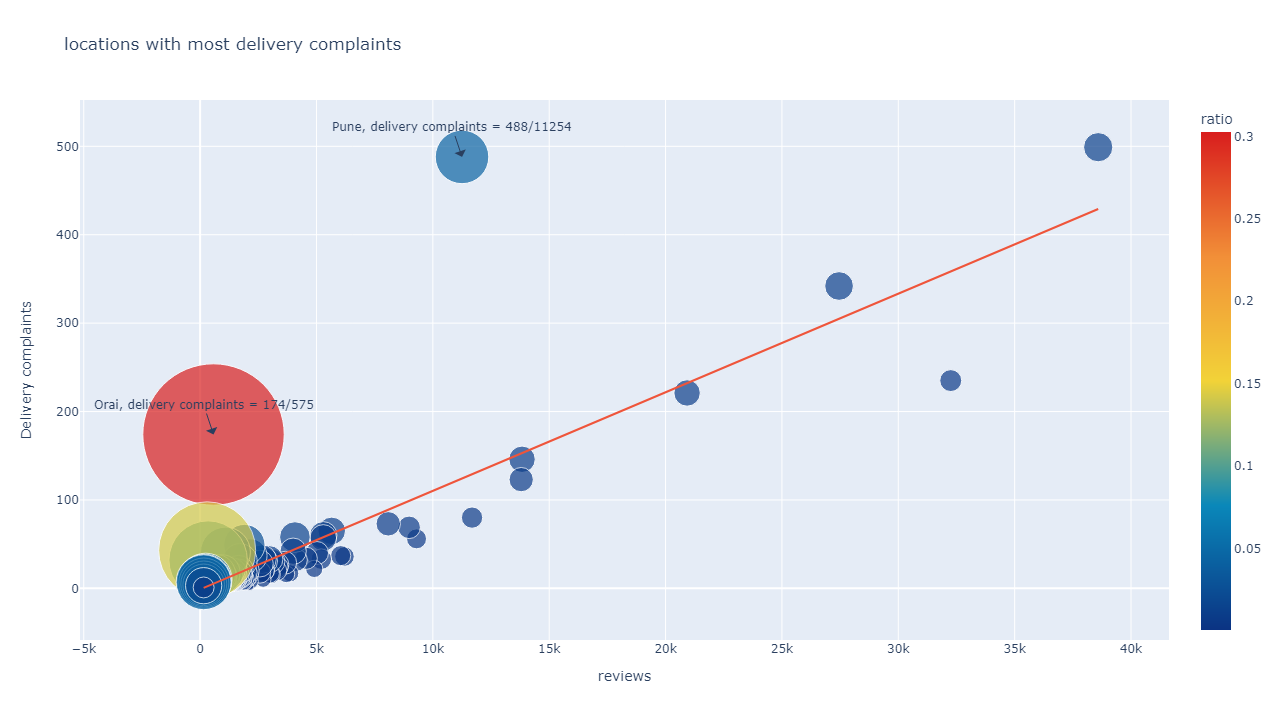

In [52]:
fig = px.scatter(df_most_dlv_compl,
                 x='total_reviews',
                 y='delivery_complaints',
                 hover_name='customers_city',
                 color='ratio',
                 color_continuous_scale='Portland',
                 size='ratio',
                 size_max=100,
                 trendline="ols",
                 trendline_scope="overall",
                 title='locations with most delivery complaints'
                )
fig.update_layout(xaxis_title='reviews',yaxis_title='Delivery complaints')
fig.update_layout(showlegend=False)

fig.add_annotation(x=575,y=174,arrowhead=1,arrowsize=2,
                   text='Orai, delivery complaints = 174/575',
                   showarrow=True,
                  )

fig.add_annotation(x=11254,y=488,arrowhead=1,arrowsize=2,
                   text='Pune, delivery complaints = 488/11254',
                   showarrow=True,
                  )

fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\locations with most delivery complaints.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))

## Q9. Ploting the Folium heatmap of customer locations which have most delivery issues

In [233]:
import folium
from folium.plugins import HeatMap

In [234]:
df_lat_long = df[['customers_city','latitude','longitude']]
df_most_dlv_compl = df_most_dlv_compl.merge(df_lat_long,on='customers_city',how="left")

In [235]:
df_most_dlv_compl = df_most_dlv_compl.drop_duplicates(subset=['customers_city'])

In [236]:
df_most_dlv_compl.head()

customers_city  total_reviews  delivery_complaints     ratio  \
0           Bengaluru          38590                499.0  0.012931   
38590       New Delhi          32254                235.0  0.007286   
70844       Hyderabad          27455                342.0  0.012457   
98299         Chennai          20925                221.0  0.010562   
119224         Mumbai          13833                146.0  0.010554   

         latitude  longitude  
0       12.978814  77.603557  
38590   28.613895  77.209006  
70844   17.360589  78.474061  
98299   13.083694  80.270186  
119224  19.075990  72.877393

In [244]:
def generatebasemap(default_location=[22.9734 , 78.6569],default_zoom_start=5):
    basemap = folium.Map(location=default_location , zoom_start=default_zoom_start)
    return basemap

In [250]:
basemap = generatebasemap()
HeatMap(df_most_dlv_compl[['latitude','longitude','ratio']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [252]:
basemap.save(r"C:\Users\sumit\End_To_End_DataAnalysis\images\map_most delivery issues.html")

In [ ]:
"C:\Users\sumit\End_To_End_DataAnalysis\images\map_most delivery issues.png"

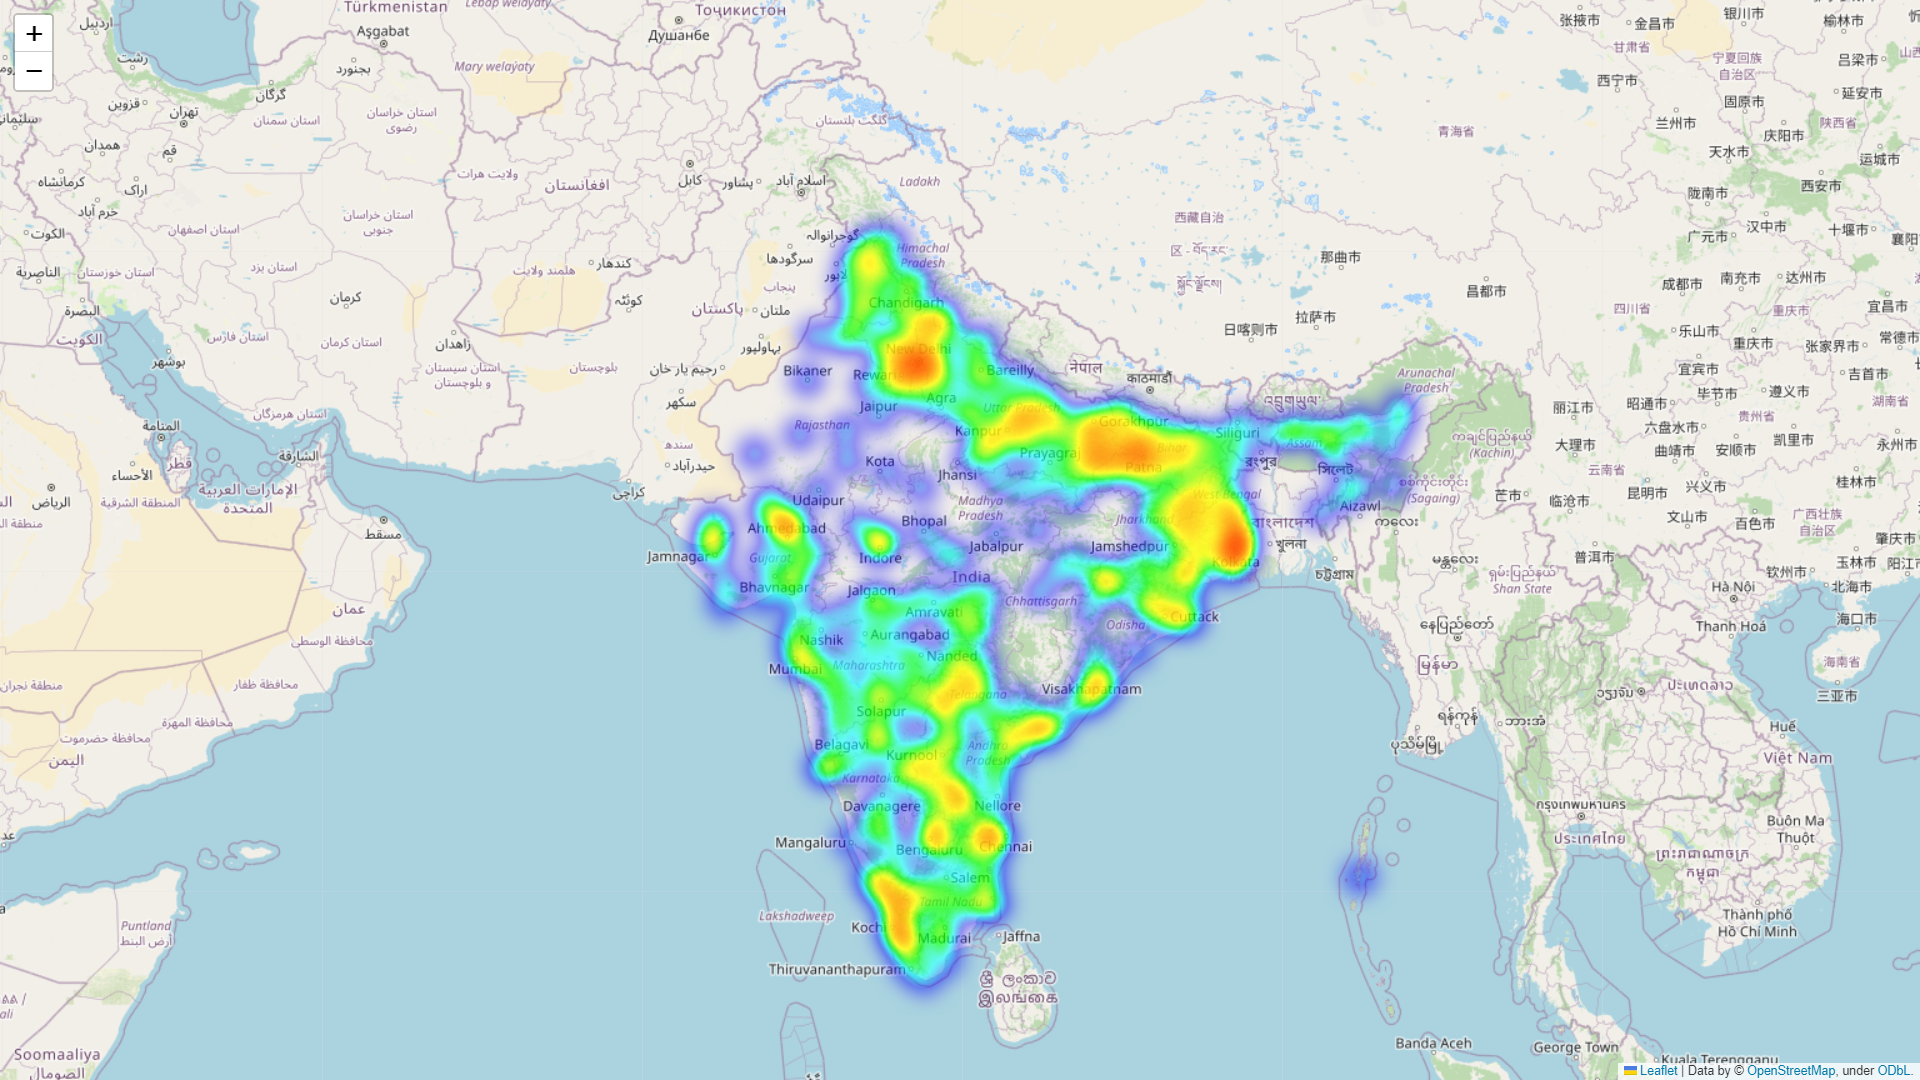

In [253]:
# Display the map in the Jupyter notebook
Image(filename= r"C:\Users\sumit\End_To_End_DataAnalysis\images\map_most delivery issues.png")

# 4. Time-Based Insights

In [263]:
df.head()

prod_id                                       product_name brand_name  \
0  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
1  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
2  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
3  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   
4  lapto6288  acer Aspire 3 Core i5 11th Gen - (8 GB/512 GB ...       acer   

  category    price  sold                                           prod_url  \
0   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
1   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
2   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
3   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   
4   laptop  44999.0     1  https://www.flipkart.com/acer-aspire-3-core-i5...   

         customer_name purchase_date customers_city  ...  purchase_year  \
0    Flipkart Customer    2023-01-01       Karimpur  ...           2023   
1    Flipkart Customer    2023-01-01         Ranchi  ...           2023   
2       Dhiraj Jaiswal    2023-01-01          Sidhi  ...           2023   
3  Vasamsetti Durgayya    2023-01-01      Hyderabad  ...           2023   
4    Flipkart Customer    2023-01-01      Bengaluru  ...           2023   

                                      short_name  \
0  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
1  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
2  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
3  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   
4  acer Aspire 3 Core i5 11th Gen - (8 GB/512...   

                                             address   latitude  longitude  \
0  Karimpur,Karimpur-I,Nadia,West Bengal,741152,I...  23.981603  88.629610   
1                       Jharkhand,Kanke,Ranchi,India  23.455981  85.255730   
2  Sidhi,Gopadbanas Tahsil,Madhya Pradesh,486600,...  24.410892  81.879469   
3  Hyderabad,Bahadurpura mandal,Telangana,500 002...  17.360589  78.474061   
4                          Bengaluru,Karnataka,India  12.978814  77.603557   

            state    price_range     label  sent_score           complain_type  
0     West Bengal  25000-50000 ₹  POSITIVE    0.999839            no complaint  
1       Jharkhand  25000-50000 ₹  POSITIVE    0.999855            no complaint  
2  Madhya Pradesh  25000-50000 ₹  POSITIVE    0.999816            no complaint  
3       Telangana  25000-50000 ₹  POSITIVE    0.999848            no complaint  
4       Karnataka  25000-50000 ₹  NEGATIVE    0.999649  unidentified complaint  

[5 rows x 24 columns]

### Lets analyze the most reviewed product on flipkart

In [291]:
reviews_count = df['comment'].groupby(df['product_name']).count().reset_index()
reviews_count.columns=["product_name","reviews_count"]

In [292]:
reviews_count.sort_values(by='reviews_count',ascending=False)[0:1]

product_name  reviews_count
894  REDMI 9i Sport (Coral Green, 64 GB)           9500

### REDMI 9i Sport (Coral Green, 64 GB) have most reviews count = 9500

#### We will group positive and negative reviews by reviews date

In [293]:
p_reviews_by_date = df['label'][df['label']=='POSITIVE'].groupby(df['purchase_date']).count().reset_index()
p_reviews_by_date.columns=['purchase_date','POSITIVE_reviews']
p_reviews_by_date.head()

purchase_date  POSITIVE_reviews
0    2014-12-01                 1
1    2015-02-01                 1
2    2015-03-01                 1
3    2015-04-01                 2
4    2015-05-01                 1

In [294]:
n_reviews_by_date = df['label'][df['label']=='NEGATIVE'].groupby(df['purchase_date']).count().reset_index()
n_reviews_by_date.columns=['purchase_date','NEGATIVE_reviews']
n_reviews_by_date.head()

purchase_date  NEGATIVE_reviews
0    2015-01-01                 1
1    2015-04-01                 2
2    2015-05-01                 1
3    2015-06-01                34
4    2015-07-01                30

In [295]:
df_polarity_by_date = p_reviews_by_date.merge(n_reviews_by_date, on='purchase_date')

In [296]:
# Convert the 'date_column' column to datetime
df_polarity_by_date['purchase_date'] = pd.to_datetime(df_polarity_by_date['purchase_date'])

In [297]:
df_polarity_by_date.head()

purchase_date  POSITIVE_reviews  NEGATIVE_reviews
0    2015-04-01                 2                 2
1    2015-05-01                 1                 1
2    2015-07-01                62                30
3    2015-08-01                 1                60
4    2015-11-01                 1                 1

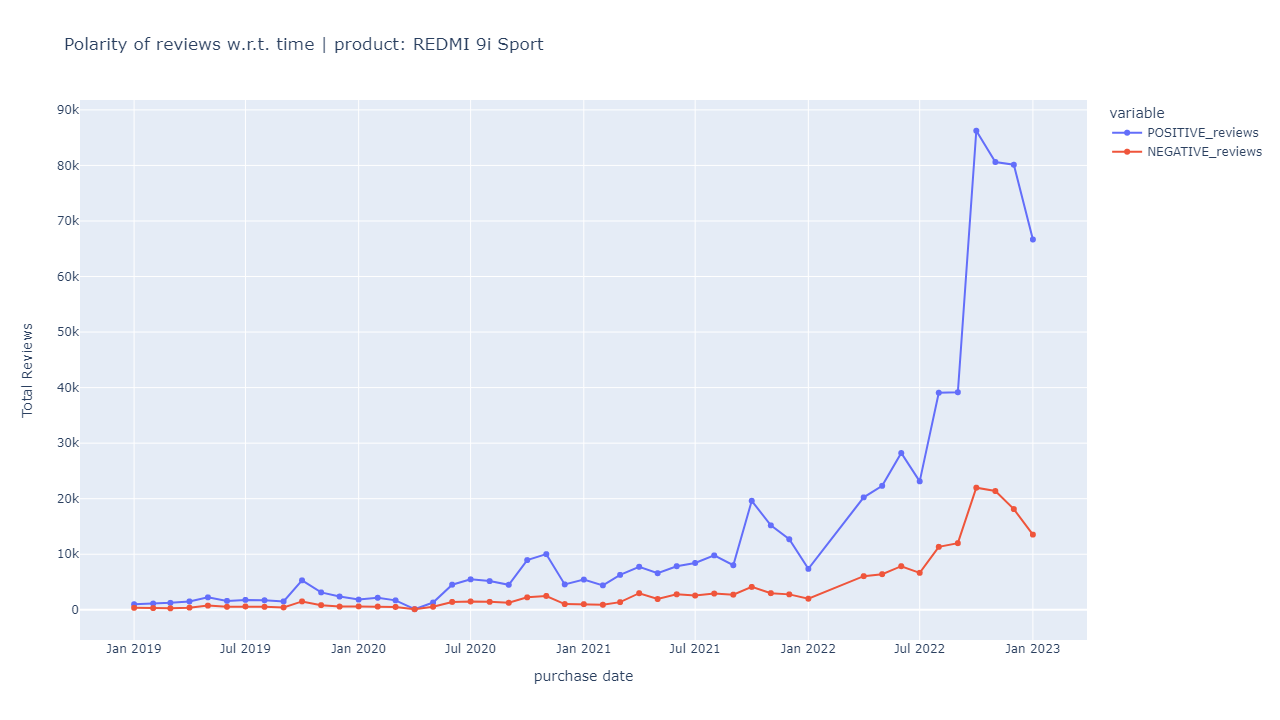

In [303]:
fig = px.line(df_polarity_by_date[df_polarity_by_date['purchase_date']>='2019-01-01'],
              x= 'purchase_date',
              y= ['POSITIVE_reviews' , 'NEGATIVE_reviews'],
              markers=True,
              title='Polarity of reviews w.r.t. time | product: REDMI 9i Sport'
             )
fig.update_layout(xaxis_title='purchase date',yaxis_title='Total Reviews')

fig.write_image(r"C:\Users\sumit\End_To_End_DataAnalysis\images\Polarity of reviews REDMI 9i Sport.jpeg",
               width=1280, height=720, engine="kaleido", scale=2)

Image(fig.to_image(format="png", width=1280, height=720, engine="kaleido", scale=1))